### Ahmed Salah Ahmed Herez

# 1. Perform Data Preparation.

In [1]:
# Importing liabraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")
from itertools import product
import seaborn as sns

import ipywidgets as widgets

In [2]:
# read in csv file as a DataFrame
df=pd.read_csv("prosperLoanData.csv")

In [3]:
# explore the first 5 rows
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [4]:
# size of the dataset
df.shape

(113937, 81)

In [5]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
#column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
#duplicated row
df.duplicated().sum()

0

In [8]:
#print the data type of all columns
df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

# 2. Data Cleaning.


In [9]:
#rows with missing values
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [10]:
# finding columns with missing values
missing_value=df.isnull()
missing_value_count = missing_value.sum()
columns_with_missing_values = missing_value_count[missing_value_count > 0 ].index
print(columns_with_missing_values)

Index(['CreditGrade', 'ClosedDate', 'BorrowerAPR', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'GroupKey',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOne

In [11]:
#identify categorical columns
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
#print categorical column
print(categorical_columns)

['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus', 'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey']


In [12]:
#identify numerical column
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
print(numerical_columns)

['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'Pros

In [13]:
# get the percentage of missing values in each column
missing = df.isna().mean().round(4) * 100
print(missing)

ListingKey                              0.00
ListingNumber                           0.00
ListingCreationDate                     0.00
CreditGrade                            74.59
Term                                    0.00
LoanStatus                              0.00
ClosedDate                             51.65
BorrowerAPR                             0.02
BorrowerRate                            0.00
LenderYield                             0.00
EstimatedEffectiveYield                25.53
EstimatedLoss                          25.53
EstimatedReturn                        25.53
ProsperRating (numeric)                25.53
ProsperRating (Alpha)                  25.53
ProsperScore                           25.53
ListingCategory (numeric)               0.00
BorrowerState                           4.84
Occupation                              3.15
EmploymentStatus                        1.98
EmploymentStatusDuration                6.69
IsBorrowerHomeowner                     0.00
CurrentlyI

In [14]:
# get the percentage of missing values in each categorical column
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_missing = df[cat_cols].isna().mean().round(4) * 100
print(cat_missing)

ListingKey                  0.00
ListingCreationDate         0.00
CreditGrade                74.59
LoanStatus                  0.00
ClosedDate                 51.65
ProsperRating (Alpha)      25.53
BorrowerState               4.84
Occupation                  3.15
EmploymentStatus            1.98
GroupKey                   88.29
DateCreditPulled            0.00
FirstRecordedCreditLine     0.61
IncomeRange                 0.00
LoanKey                     0.00
LoanOriginationDate         0.00
LoanOriginationQuarter      0.00
MemberKey                   0.00
dtype: float64


In [15]:
# get the percentage of missing values in each numerical column
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
num_missing = df[num_cols].isna().mean().round(4) * 100
print(num_missing)

ListingNumber                           0.00
Term                                    0.00
BorrowerAPR                             0.02
BorrowerRate                            0.00
LenderYield                             0.00
EstimatedEffectiveYield                25.53
EstimatedLoss                          25.53
EstimatedReturn                        25.53
ProsperRating (numeric)                25.53
ProsperScore                           25.53
ListingCategory (numeric)               0.00
EmploymentStatusDuration                6.69
CreditScoreRangeLower                   0.52
CreditScoreRangeUpper                   0.52
CurrentCreditLines                      6.67
OpenCreditLines                         6.67
TotalCreditLinespast7years              0.61
OpenRevolvingAccounts                   0.00
OpenRevolvingMonthlyPayment             0.00
InquiriesLast6Months                    0.61
TotalInquiries                          1.02
CurrentDelinquencies                    0.61
AmountDeli

In [16]:
#Create a copy of the original DataFrame to avoid making changes to the original data:

new_df = df.copy()


In [17]:
new_df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [18]:
# separate numerical and categorical columns
num_cols =new_df.select_dtypes(include=['float', 'int']).columns.tolist()
cat_cols =new_df.select_dtypes(include=['object']).columns.tolist()

In [19]:
# Print number of Categorical and Numerical columns
print("Categorical columns: ",len(new_df.select_dtypes(include=['object']).columns))
print("Numerical columns: ",len(new_df.select_dtypes(exclude=['object']).columns))

Categorical columns:  17
Numerical columns:  64


In [20]:
# determine whether to drop or fill numerical data
for col in num_cols:
    if missing[col] > 75:
        new_df = new_df.drop(col, axis=1)
        print("Dropped column", col)
    else:
        fill_value = new_df[col].median()
        new_df[col] = new_df[col].fillna(fill_value)
        print("Filled column", col)

# determine whether to drop or fill categorical data
for col in cat_cols:
    if missing[col] > 75:
        new_df = new_df.drop(col, axis=1)
        print("Dropped column", col)
    else:
        fill_value = new_df[col].mode()[0]
        new_df[col] = new_df[col].fillna(fill_value)
        print("Filled column", col)

Filled column ListingNumber
Filled column Term
Filled column BorrowerAPR
Filled column BorrowerRate
Filled column LenderYield
Filled column EstimatedEffectiveYield
Filled column EstimatedLoss
Filled column EstimatedReturn
Filled column ProsperRating (numeric)
Filled column ProsperScore
Filled column ListingCategory (numeric)
Filled column EmploymentStatusDuration
Filled column CreditScoreRangeLower
Filled column CreditScoreRangeUpper
Filled column CurrentCreditLines
Filled column OpenCreditLines
Filled column TotalCreditLinespast7years
Filled column OpenRevolvingAccounts
Filled column OpenRevolvingMonthlyPayment
Filled column InquiriesLast6Months
Filled column TotalInquiries
Filled column CurrentDelinquencies
Filled column AmountDelinquent
Filled column DelinquenciesLast7Years
Filled column PublicRecordsLast10Years
Filled column PublicRecordsLast12Months
Filled column RevolvingCreditBalance
Filled column BankcardUtilization
Filled column AvailableBankcardCredit
Filled column TotalTrade

For each numerical column, it checks if the percentage of missing values is greater than 75% because we will use Creidt Grade column and it more than 70 %. If so, it drops the column using the drop() method. If not, it fills the missing values with the median of that column using the fillna() method.

For each categorical column, it follows the same process but fills the missing values with the mode of that column using the fillna() method.

Note that the fill method used for numerical columns is the median, which is more robust to outliers than the mean. The fill method used for categorical columns is the mode, which is the most common value in the column. These fill methods can be adjusted based on the specific nature of the data.

In [21]:
#check is there any missing value remaining
new_df.isnull().sum().any()

False

In [22]:
new_df.isnull().sum()/(len(new_df))*100

ListingKey                            0.0
ListingNumber                         0.0
ListingCreationDate                   0.0
CreditGrade                           0.0
Term                                  0.0
LoanStatus                            0.0
ClosedDate                            0.0
BorrowerAPR                           0.0
BorrowerRate                          0.0
LenderYield                           0.0
EstimatedEffectiveYield               0.0
EstimatedLoss                         0.0
EstimatedReturn                       0.0
ProsperRating (numeric)               0.0
ProsperRating (Alpha)                 0.0
ProsperScore                          0.0
ListingCategory (numeric)             0.0
BorrowerState                         0.0
Occupation                            0.0
EmploymentStatus                      0.0
EmploymentStatusDuration              0.0
IsBorrowerHomeowner                   0.0
CurrentlyInGroup                      0.0
DateCreditPulled                  

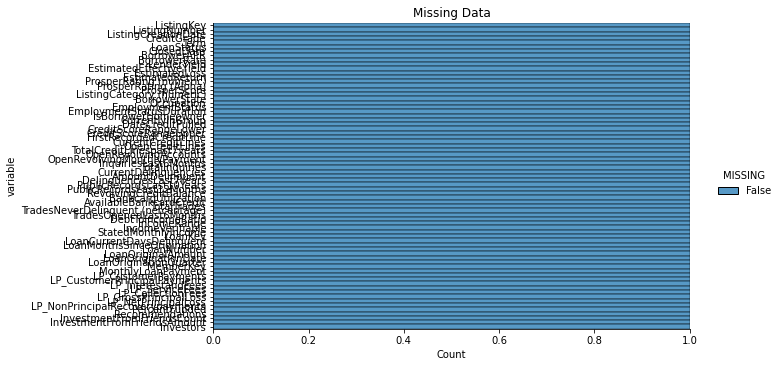

In [23]:
sns.displot(
    data=new_df.isna().melt(value_name="MISSING"),
    y="variable",
    hue="MISSING",
    multiple="fill",
    aspect=2
);
plt.title('Missing Data');

# 3. Data Encoding.

In [24]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
#Convert categorical columns to numerical using one-hot encoding or label encoding.
categorical_column = ['ListingKey', 'ListingCreationDate', 'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey']

le = LabelEncoder()
new_df[categorical_column] = new_df[categorical_column].apply(LabelEncoder().fit_transform)

In [25]:
# Print number of Categorical and Numerical columns
print("Categorical columns: ",len(new_df.select_dtypes(include=['object']).columns))
print("Numerical columns: ",len(new_df.select_dtypes(exclude=['object']).columns))

Categorical columns:  2
Numerical columns:  69


In [26]:
new_df.head()

ListingKey  ListingNumber  ListingCreationDate CreditGrade  Term  \
0        7179         193129                14183           C    36   
1        7192        1209647               111893           C    36   
2        6646          81716                 6428          HR    36   
3        6668         658116                64759           C    36   
4        6685         909464                85966           C    36   

  LoanStatus  ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
0  Completed        1136      0.16516        0.1580       0.1380   
1    Current        2795      0.12016        0.0920       0.0820   
2  Completed        1261      0.28269        0.2750       0.2400   
3    Current        2795      0.12528        0.0974       0.0874   
4    Current        2795      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                  0.16150         0.0724          0.09170   
1                  0.07960         0.0249          0.05470   
2                  0.16150         0.0724          0.09170   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   

   ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                      4.0                      3           6.0   
1                      6.0                      0           7.0   
2                      4.0                      3           6.0   
3                      6.0                      0           9.0   
4                      3.0                      4           4.0   

   ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                          0              5          35                 7   
1                          2              5          41                 0   
2                          0             10          35                 2   
3                         16             10          50                 0   
4                          2             23          19                 0   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                       2.0                 True              True   
1                      44.0                False             False   
2                      67.0                False              True   
3                     113.0                 True             False   
4                      44.0                 True             False   

   DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
0             14346                  640.0                  659.0   
1            111882                  680.0                  699.0   
2              6445                  480.0                  499.0   
3             64723                  800.0                  819.0   
4             85856                  680.0                  699.0   

   FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  \
0                     8637                 5.0              4.0   
1                     6615                14.0             14.0   
2                     8925                10.0              9.0   
3                     2245                 5.0              5.0   
4                     9496                19.0             19.0   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
0                        12.0                      1   
1                        29.0                     13   
2                         3.0                      0   
3                        29.0                      7   
4                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                         24.0                   3.0             3.0   
1                        389.0                   3.0             5.0   
2                          0.0                   0.0             1.0   
3                        115.0                   0.0            

In [27]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [28]:
new_df.shape

(113937, 71)

In [29]:
# Drop the columns that are not required for analysis
new_df.drop(columns=["ListingKey","ListingNumber", "LoanKey","MemberKey", "LoanNumber", ], inplace=True)
print(new_df.shape)

(113937, 66)


### Working on target variable (loan Status)

In [30]:
# let's find the counts of each status categories 
new_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [31]:
# filtering out Current Status records
new_df_filter =new_df[new_df.LoanStatus != 'Current']

In [32]:
new_df_filter

ListingCreationDate CreditGrade  Term              LoanStatus  \
0                     14183           C    36               Completed   
2                      6428          HR    36               Completed   
11                    15373           C    36               Completed   
12                   100484           C    36    Past Due (1-15 days)   
15                    53245           C    36               Defaulted   
...                     ...         ...   ...                     ...   
113927                22425          AA    36               Completed   
113928                40602           C    36               Completed   
113929                79299           C    36               Completed   
113933                45730           C    36  FinalPaymentInProgress   
113935                46133           C    60               Completed   

        ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
0             1136      0.16516        0.1580       0.1380   
2             1261      0.28269        0.2750       0.2400   
11             536      0.15033        0.1325       0.1225   
12            2795      0.17969        0.1435       0.1335   
15            2355      0.35797        0.3177       0.3077   
...            ...          ...           ...          ...   
113927        1769      0.07469        0.0679       0.0579   
113928        1901      0.22362        0.1899       0.1799   
113929        2770      0.30285        0.2639       0.2539   
113933        2795      0.13220        0.1110       0.1010   
113935        2592      0.28408        0.2605       0.2505   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                        0.1615         0.0724           0.0917   
2                        0.1615         0.0724           0.0917   
11                       0.1615         0.0724           0.0917   
12                       0.1264         0.0524           0.0740   
15                       0.2896         0.1650           0.1246   
...                         ...            ...              ...   
113927                   0.1615         0.0724           0.0917   
113928                   0.1757         0.0610           0.1147   
113929                   0.2318         0.1225           0.1093   
113933                   0.1007         0.0200           0.0807   
113935                   0.2445         0.0850           0.1595   

        ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                           4.0                      3           6.0   
2                           4.0                      3           6.0   
11                          4.0                      3           6.0   
12                          5.0                      2           4.0   
15                          1.0                      6           5.0   
...                         ...                    ...           ...   
113927                      4.0                      3           6.0   
113928                      4.0                      3           6.0   
113929                      2.0                      5           3.0   
113933                      6.0                      0           8.0   
113935                      4.0                      3           5.0   

        ListingCategory (numeric)  BorrowerState  Occupation  \
0                               0              5          35   
2                               0             10          35   
11                              0              4          66   
12                              1              1          48   
15                             13              9          35   
...                           ...            ...         ...   
113927                          4             47          19   
113928                          3              5          35   
113929                          2              9           0   
113933                          7             38          41   
113935      

In [33]:
new_df_filter['LoanStatus'].value_counts()

Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [34]:
new_df_filter['LoanStatus'] = new_df_filter['ClosedDate'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [35]:
new_df_filter['LoanStatus'].value_counts()

1    57361
Name: LoanStatus, dtype: int64

In [36]:
new_df_filter['LoanCurrentDaysDelinquent'].value_counts()

0       38284
121       293
10        192
4          77
11         62
        ...  
582         1
1099        1
2555        1
787         1
1081        1
Name: LoanCurrentDaysDelinquent, Length: 2411, dtype: int64

In [37]:
new_df_filter['LoanStatus'] = new_df_filter['LoanCurrentDaysDelinquent'].apply(lambda x:1 if x > 180 else 0)


In [38]:
new_df_filter['LoanStatus'].value_counts()

0    42298
1    15063
Name: LoanStatus, dtype: int64

In [39]:
# drop columns that has been renamed
new_df_filter.drop(['LoanCurrentDaysDelinquent','ClosedDate'], axis=1,inplace=True)

In [40]:
new_df_filter

ListingCreationDate CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                     14183           C    36           0      0.16516   
2                      6428          HR    36           0      0.28269   
11                    15373           C    36           0      0.15033   
12                   100484           C    36           0      0.17969   
15                    53245           C    36           0      0.35797   
...                     ...         ...   ...         ...          ...   
113927                22425          AA    36           0      0.07469   
113928                40602           C    36           0      0.22362   
113929                79299           C    36           0      0.30285   
113933                45730           C    36           0      0.13220   
113935                46133           C    60           0      0.28408   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0             0.1580       0.1380                   0.1615         0.0724   
2             0.2750       0.2400                   0.1615         0.0724   
11            0.1325       0.1225                   0.1615         0.0724   
12            0.1435       0.1335                   0.1264         0.0524   
15            0.3177       0.3077                   0.2896         0.1650   
...              ...          ...                      ...            ...   
113927        0.0679       0.0579                   0.1615         0.0724   
113928        0.1899       0.1799                   0.1757         0.0610   
113929        0.2639       0.2539                   0.2318         0.1225   
113933        0.1110       0.1010                   0.1007         0.0200   
113935        0.2605       0.2505                   0.2445         0.0850   

        EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0                0.0917                      4.0                      3   
2                0.0917                      4.0                      3   
11               0.0917                      4.0                      3   
12               0.0740                      5.0                      2   
15               0.1246                      1.0                      6   
...                 ...                      ...                    ...   
113927           0.0917                      4.0                      3   
113928           0.1147                      4.0                      3   
113929           0.1093                      2.0                      5   
113933           0.0807                      6.0                      0   
113935           0.1595                      4.0                      3   

        ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0                6.0                          0              5          35   
2                6.0                          0             10          35   
11               6.0                          0              4          66   
12               4.0                          1              1          48   
15               5.0                         13              9          35   
...              ...                        ...            ...         ...   
113927           6.0                          4             47          19   
113928           6.0                          3              5          35   
113929           3.0                          2              9           0   
113933           8.0                          7             38          41   
113935           5.0                          2             10          22   

        EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                      7                       2.0                 True   
2                      2                      67.0                False   
11                     1                      19.0                False   
12                     0                       1.0      

In [41]:
# Print number of Categorical and Numerical columns
print("Categorical columns: ",len(new_df_filter.select_dtypes(include=['object']).columns))
print("Numerical columns: ",len(new_df_filter.select_dtypes(exclude=['object']).columns))

Categorical columns:  1
Numerical columns:  63


### Exploratory Data Analysis

##### Question no (1)  What are the most number of borrowers Credit Grade?
###### Check the univariate relationship of Credit Grade

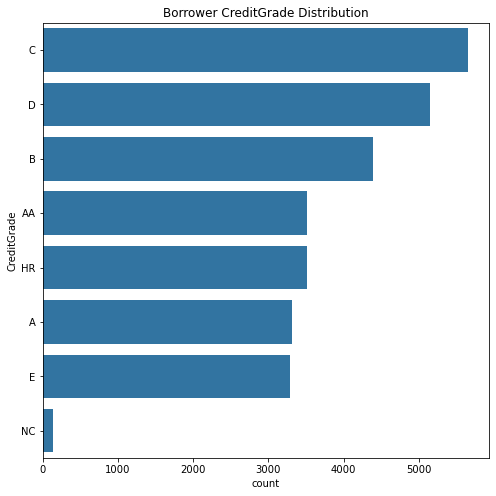

In [42]:
#Borrower CreditGrade Distribution
base_color = sns.color_palette()[0]
cat_order = df.CreditGrade.value_counts().index
plt.figure(figsize=[8, 8])
sns.countplot(data=df,y='CreditGrade',color=base_color, order=cat_order);
plt.title('Borrower CreditGrade Distribution');

### Creidt Grade "C" has the most  borrower CreditGrade number

###############################################################

##### Question no (2) Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?
 #we are see in the graph of the borrower creidt grade distribution for C,D we conclude that C,D has the highest Count so then it will lead higher amount of deliquency

 #we are visualized in the graph of the borrower creditGrade distribution for C,D that
 
 #we conclude that C and D has the highest Count so then the deliquency of <180 days has been excluded so that's why it will lead to higher amount of deliquency.

##### Check the univariate relationship of Loan Status


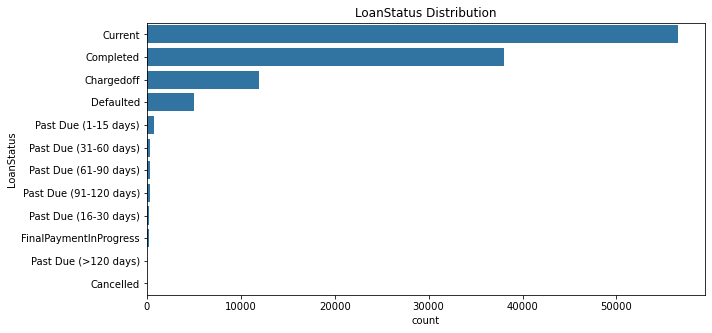

In [43]:
#LoanStatus Distribution
base_color = sns.color_palette()[0]
cat_order = df.LoanStatus.value_counts().index
plt.figure(figsize=[10, 5])
sns.countplot(data=df,y='LoanStatus',color=base_color, order=cat_order);
plt.title('LoanStatus Distribution');

 #### we conclude from this chart here that count of persons with current loan status is more than 50000 , and completed status contain more about 35000  , chargedoff status about 12000  , Defaulted statues about 8000 .

########################################################

##### Question no (3) What is the highest number of BorrowerRate?

(array([6.3000e+01, 1.1966e+04, 2.5660e+04, 2.6902e+04, 1.8819e+04,
        1.7516e+04, 1.0953e+04, 2.0500e+03, 2.0000e+00, 6.0000e+00]),
 array([0.     , 0.04975, 0.0995 , 0.14925, 0.199  , 0.24875, 0.2985 ,
        0.34825, 0.398  , 0.44775, 0.4975 ]),
 <BarContainer object of 10 artists>)

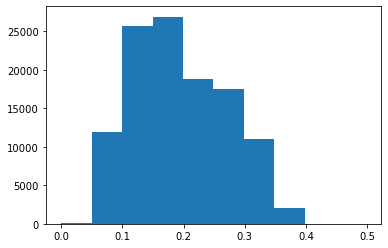

In [44]:
#Check the univariate relationship of borrower rate
plt.hist(df['BorrowerRate'])

#####   We get here that the highest number of Borrower Rate is between 0.1 and 0.2

###############################################################

##### Question no (4) Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

(array([1.4700e+02, 1.2390e+04, 2.6436e+04, 2.7063e+04, 1.9921e+04,
        1.5778e+04, 1.2169e+04, 2.5000e+01, 5.0000e+00, 3.0000e+00]),
 array([-0.01   ,  0.04025,  0.0905 ,  0.14075,  0.191  ,  0.24125,
         0.2915 ,  0.34175,  0.392  ,  0.44225,  0.4925 ]),
 <BarContainer object of 10 artists>)

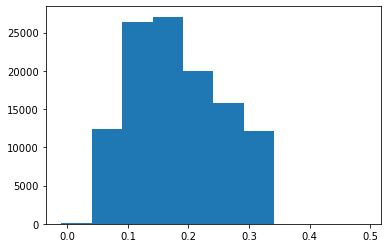

In [45]:
# Check the univariate relationship of Lender Yield on Loan
plt.hist(df['LenderYield'])


<AxesSubplot:xlabel='LenderYield', ylabel='Density'>

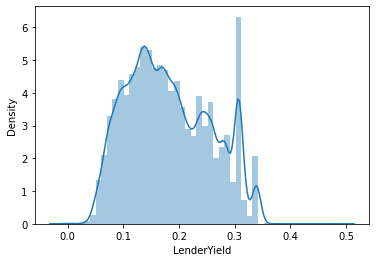

In [46]:
sns.distplot(df["LenderYield"])
# This distplot visualize better using kde


##### Yes we see here also that  the highest number of Lender Yield is between 0.1 and 0.2 

#################################################################

##### Question no (5) Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

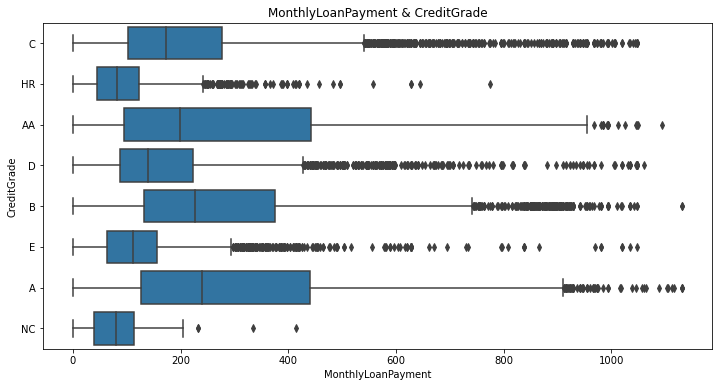

In [47]:
# Check the Bivariate Relationship between CreditGarde and MonthlyLoan Payment
# Using Boxplot for numerical vs categorical variable.
plt.figure(figsize = [12, 6])
sns.boxplot(data=df,x='MonthlyLoanPayment',y='CreditGrade',color=base_color);
plt.xlabel('MonthlyLoanPayment');
plt.ylabel('CreditGrade');
plt.title('MonthlyLoanPayment & CreditGrade');

##### As we see here CreditGrade 'AA' , 'A' &'B' has high Monthly LoanPayment as compared to others and it's leads to higher Monthly Loan Payment.


#################################################################

##### Question no (6) Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade. 


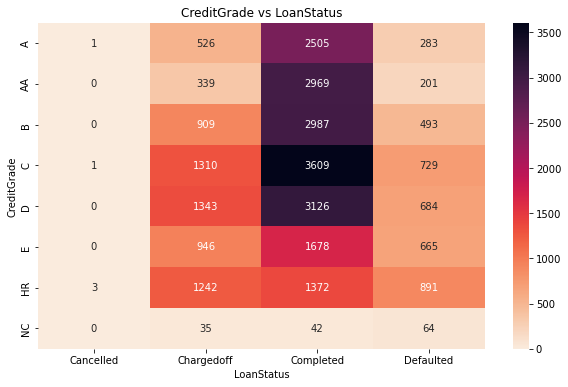

In [48]:
###### Check the Bivariate Relatonship between CreditGrade and LoanStatus
##### One way also to check the accauracy and to show the relationship between two categorical variables is through a heat map.
cat_counts = df.groupby(['CreditGrade', 'LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'CreditGrade', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [10, 6])
sns.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('CreditGrade vs LoanStatus');

##### By using Heat map for Checking  the accuracy of Credit Grade we conclude here that :

##### The similar colors across the rows suggests that the "LoanStatus" group sizes are similarly sized and distributed similarly across levels of "CreditGrade". 
##### The 'Completed' LoanStatus Contains higher counts of 'CreditGrade', Especially the CreidtGrade 'C' in Completed Loan status which contain the higher counts of CreidtGrade Score shown in this Heatmap.

#################################################################################

##### Question (7) Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

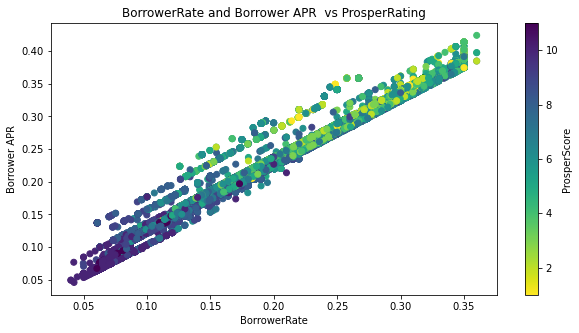

In [49]:
# Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.
plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='BorrowerRate',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('BorrowerRate')
plt.ylabel('Borrower APR')
plt.title('BorrowerRate and Borrower APR  vs ProsperRating');

##### By checking the Multivariate Relationship between BorrowerRate and BorrowerAPR using ScatterPlot we conclude here that:

###### This ScatterPlot chart confirms the relations between BorrowerAPR and BorrowerRate, they have strong positive relationship and Correlation.

##### In addition, it shows that most of loans with lower BorrowerAPR & BorrowerRate have higher ProsperScore and visa-versa.

### Feature Engineering


### 1- Handling missing values


In [50]:
# Checking Again null values
new_df.isnull().sum()


ListingCreationDate                   0
CreditGrade                           0
Term                                  0
LoanStatus                            0
ClosedDate                            0
BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperRating (Alpha)                 0
ProsperScore                          0
ListingCategory (numeric)             0
BorrowerState                         0
Occupation                            0
EmploymentStatus                      0
EmploymentStatusDuration              0
IsBorrowerHomeowner                   0
CurrentlyInGroup                      0
DateCreditPulled                      0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0
FirstRecordedCreditLine               0


In [51]:
new_df_filter.head()

ListingCreationDate CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                 14183           C    36           0      0.16516   
2                  6428          HR    36           0      0.28269   
11                15373           C    36           0      0.15033   
12               100484           C    36           0      0.17969   
15                53245           C    36           0      0.35797   

    BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0         0.1580       0.1380                   0.1615         0.0724   
2         0.2750       0.2400                   0.1615         0.0724   
11        0.1325       0.1225                   0.1615         0.0724   
12        0.1435       0.1335                   0.1264         0.0524   
15        0.3177       0.3077                   0.2896         0.1650   

    EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0            0.0917                      4.0                      3   
2            0.0917                      4.0                      3   
11           0.0917                      4.0                      3   
12           0.0740                      5.0                      2   
15           0.1246                      1.0                      6   

    ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0            6.0                          0              5          35   
2            6.0                          0             10          35   
11           6.0                          0              4          66   
12           4.0                          1              1          48   
15           5.0                         13              9          35   

    EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                  7                       2.0                 True   
2                  2                      67.0                False   
11                 1                      19.0                False   
12                 0                       1.0                False   
15                 4                     121.0                 True   

    CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
0               True             14346                  640.0   
2               True              6445                  480.0   
11             False             15487                  640.0   
12             False            100572                  680.0   
15             False             53156                  700.0   

    CreditScoreRangeUpper  FirstRecordedCreditLine  CurrentCreditLines  \
0                   659.0                     8637                 5.0   
2                   499.0                     8925                10.0   
11                  659.0                     8308                 2.0   
12                  699.0                     6851                 9.0   
15                  719.0                     7694                10.0   

    OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0               4.0                        12.0                      1   
2               9.0                         3.0                      0   
11              2.0                        10.0                      1   
12              7.0                        29.0                      8   
15              9.0                        18.0                      5   

    OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                          24.0                   3.0             3.0   
2                           0.0                   0.0             1.0   
11                         40.0                   3.0             5.0   
12                        290.0                   1.0             4.0   
15                        300.0                   0.0             1.0   

    CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0                    2.0             472.0            

#### There is no missing values


### 2-Encoding:

In [52]:
# Performing Label Encoding to selected features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoding_column = ['ListingCreationDate',
 'CreditGrade',
 'LoanStatus',
 'ClosedDate',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanOriginationDate',
 'LoanOriginationQuarter']


#  label encoding of multiple features at once

new_df[encoding_column] = new_df[encoding_column].apply(LabelEncoder().fit_transform)
new_df.head()


ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
0                14183            3    36           2        1136   
1               111893            3    36           3        2795   
2                 6428            6    36           2        1261   
3                64759            3    36           3        2795   
4                85966            3    36           3        2795   

   BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0      0.16516        0.1580       0.1380                  0.16150   
1      0.12016        0.0920       0.0820                  0.07960   
2      0.28269        0.2750       0.2400                  0.16150   
3      0.12528        0.0974       0.0874                  0.08490   
4      0.24614        0.2085       0.1985                  0.18316   

   EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0         0.0724          0.09170                      4.0   
1         0.0249          0.05470                      6.0   
2         0.0724          0.09170                      4.0   
3         0.0249          0.06000                      6.0   
4         0.0925          0.09066                      3.0   

   ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
0                      3           6.0                          0   
1                      0           7.0                          2   
2                      3           6.0                          0   
3                      0           9.0                         16   
4                      4           4.0                          2   

   BorrowerState  Occupation  EmploymentStatus  EmploymentStatusDuration  \
0              5          35                 7                       2.0   
1              5          41                 0                      44.0   
2             10          35                 2                      67.0   
3             10          50                 0                     113.0   
4             23          19                 0                      44.0   

   IsBorrowerHomeowner  CurrentlyInGroup  DateCreditPulled  \
0                 True              True             14346   
1                False             False            111882   
2                False              True              6445   
3                 True             False             64723   
4                 True             False             85856   

   CreditScoreRangeLower  CreditScoreRangeUpper  FirstRecordedCreditLine  \
0                  640.0                  659.0                     8637   
1                  680.0                  699.0                     6615   
2                  480.0                  499.0                     8925   
3                  800.0                  819.0                     2245   
4                  680.0                  699.0                     9496   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                10.0              9.0                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0                      1                         24.0                   3.0   
1                     13                        389.0                   3.0   
2                      0                          0.0                   0.0   
3                      7                        115.0                   0.0   
4                      6                        220.0                   1.0   

   TotalInquiries  CurrentDelinquencies  AmountDelinquent  \
0             3.0                   2.0             472.0   
1             5.0                   0.0               0.0   
2            

### 3-Checking the Outliers

In [53]:
# Use the describe() method to generate summary statistics for all columns
summary = new_df.describe()

# Calculate the interquartile range (IQR) for each column
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

# Identify outliers for each column
outliers = ((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR)))

# Get the columns with outliers
outliers_columns = outliers. any()

# Print the columns with outliers
print("Columns with outliers: \n")
print(outliers_columns[outliers_columns == True].index.tolist())

Columns with outliers: 

['AmountDelinquent', 'AvailableBankcardCredit', 'BankcardUtilization', 'BorrowerAPR', 'BorrowerRate', 'ClosedDate', 'CreditGrade', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'CurrentDelinquencies', 'DebtToIncomeRatio', 'DelinquenciesLast7Years', 'EmploymentStatus', 'EmploymentStatusDuration', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'IncomeRange', 'InquiriesLast6Months', 'InvestmentFromFriendsAmount', 'InvestmentFromFriendsCount', 'Investors', 'LP_CollectionFees', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_GrossPrincipalLoss', 'LP_InterestandFees', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'LP_ServiceFees', 'LenderYield', 'ListingCategory (numeric)', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'LoanStatus', 'MonthlyLoanPayment', 'OpenCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'PercentFunded', 'ProsperScore', 'PublicRecordsLast10Years', 'PublicRec

In [54]:
outliers_columns.value_counts()

True     53
False    13
dtype: int64

Column: AmountDelinquent, Number of outliers: 16497


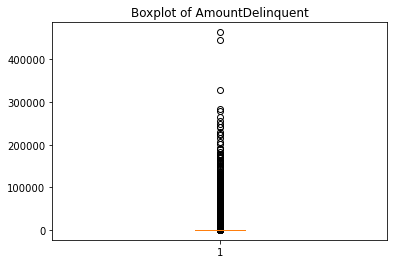

Column: AvailableBankcardCredit, Number of outliers: 11450


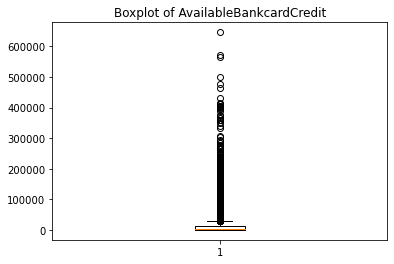

Column: BankcardUtilization, Number of outliers: 62


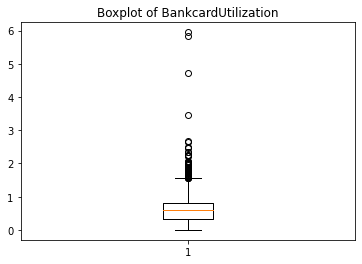

Column: BorrowerAPR, Number of outliers: 3


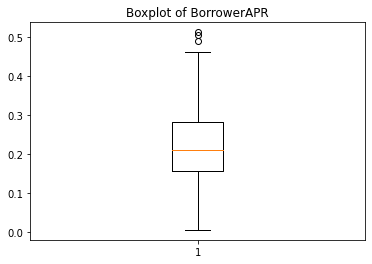

Column: BorrowerRate, Number of outliers: 6


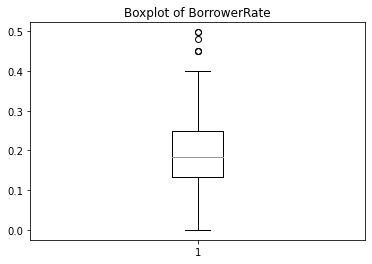

Column: ClosedDate, Number of outliers: 812


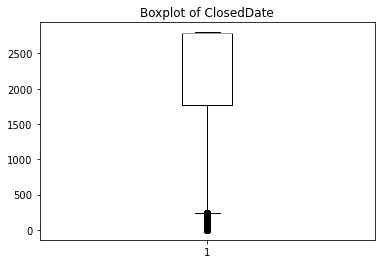

Column: CreditGrade, Number of outliers: 23304


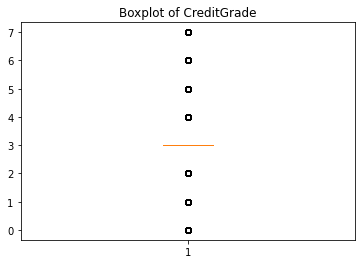

Column: CreditScoreRangeLower, Number of outliers: 7855


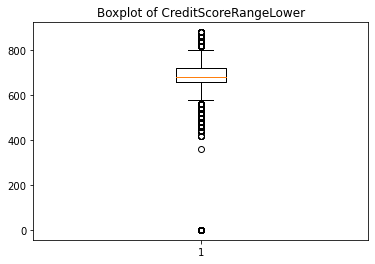

Column: CreditScoreRangeUpper, Number of outliers: 7855


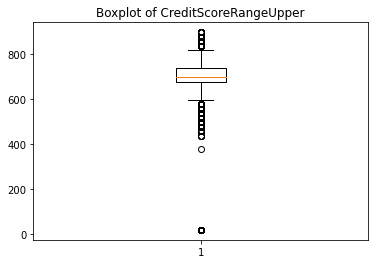

Column: CurrentCreditLines, Number of outliers: 3193


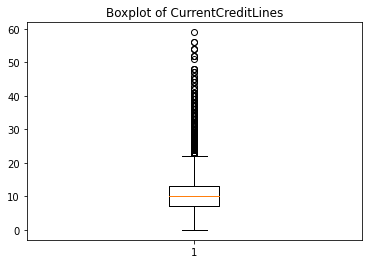

Column: CurrentDelinquencies, Number of outliers: 23498


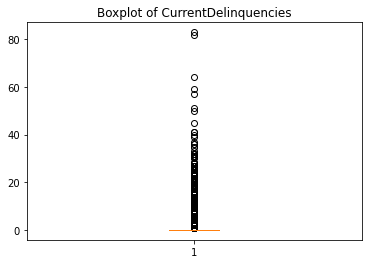

Column: DebtToIncomeRatio, Number of outliers: 3517


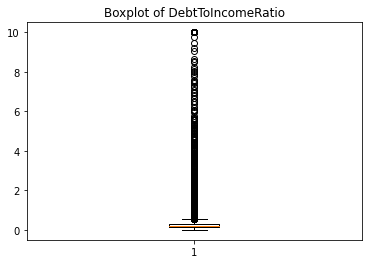

Column: DelinquenciesLast7Years, Number of outliers: 18623


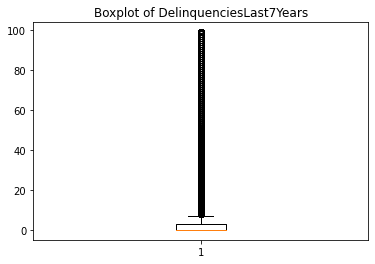

Column: EmploymentStatus, Number of outliers: 12658


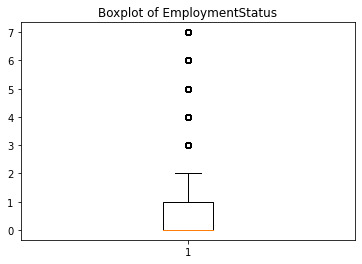

Column: EmploymentStatusDuration, Number of outliers: 6264


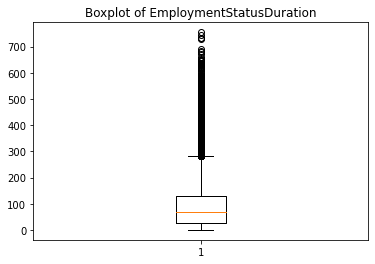

Column: EstimatedEffectiveYield, Number of outliers: 5920


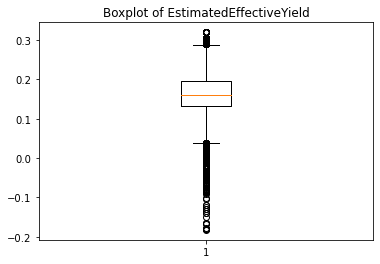

Column: EstimatedLoss, Number of outliers: 6306


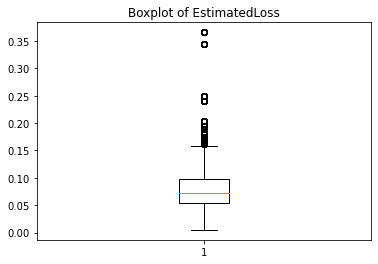

Column: EstimatedReturn, Number of outliers: 3263


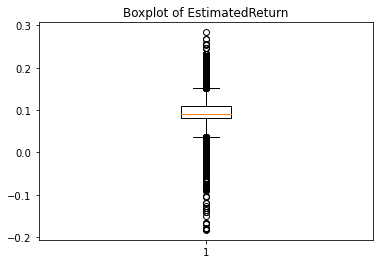

Column: IncomeRange, Number of outliers: 16442


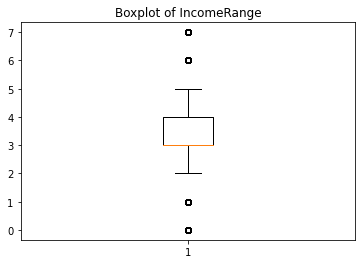

Column: InquiriesLast6Months, Number of outliers: 5578


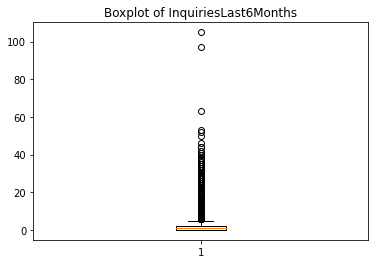

Column: InvestmentFromFriendsAmount, Number of outliers: 2131


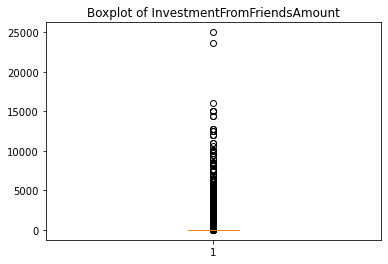

Column: InvestmentFromFriendsCount, Number of outliers: 2131


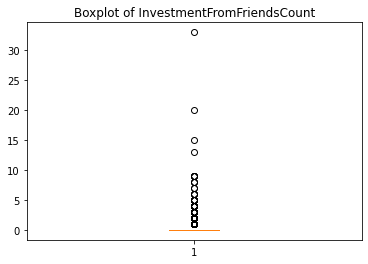

Column: Investors, Number of outliers: 6117


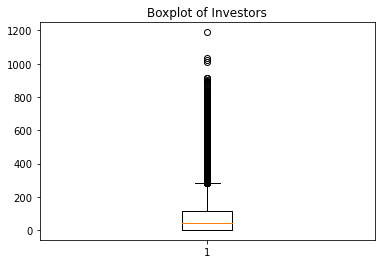

Column: LP_CollectionFees, Number of outliers: 8166


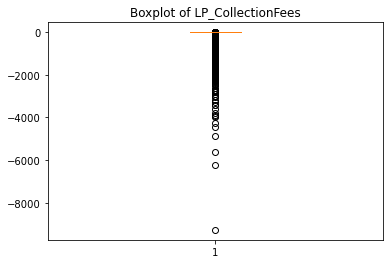

Column: LP_CustomerPayments, Number of outliers: 7364


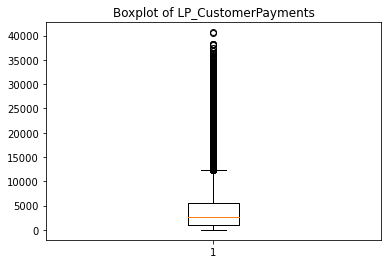

Column: LP_CustomerPrincipalPayments, Number of outliers: 9354


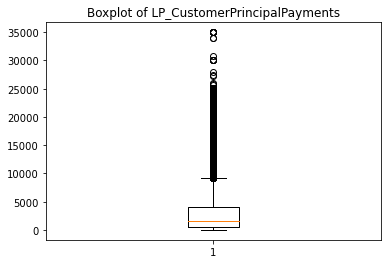

Column: LP_GrossPrincipalLoss, Number of outliers: 16903


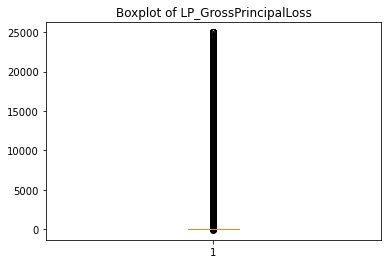

Column: LP_InterestandFees, Number of outliers: 6961


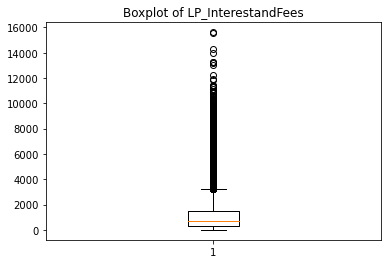

Column: LP_NetPrincipalLoss, Number of outliers: 16715


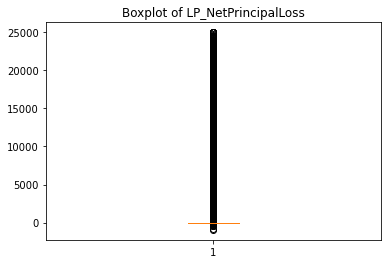

Column: LP_NonPrincipalRecoverypayments, Number of outliers: 3261


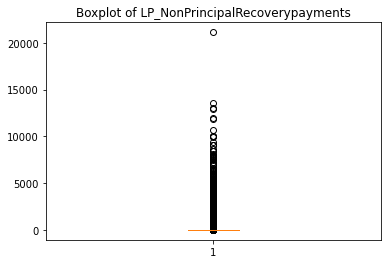

Column: LP_ServiceFees, Number of outliers: 7493


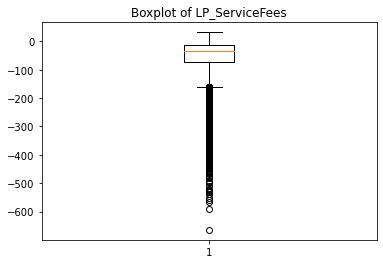

Column: LenderYield, Number of outliers: 6


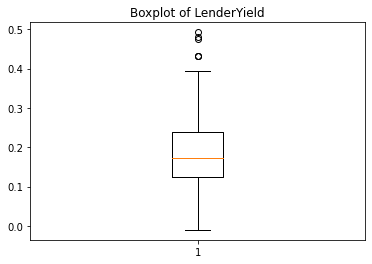

Column: ListingCategory (numeric), Number of outliers: 18319


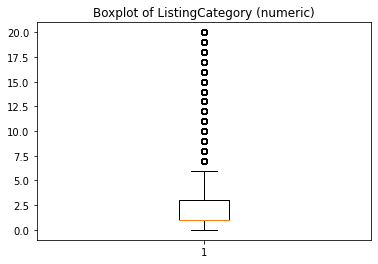

Column: LoanCurrentDaysDelinquent, Number of outliers: 19077


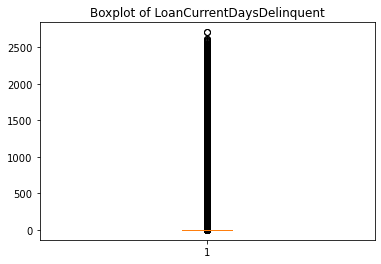

Column: LoanOriginalAmount, Number of outliers: 4395


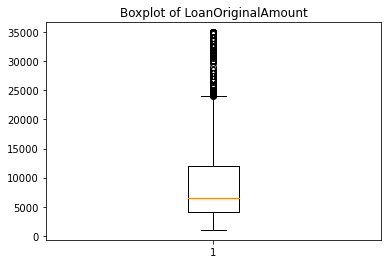

Column: LoanStatus, Number of outliers: 2277


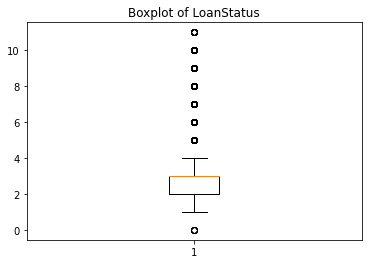

Column: MonthlyLoanPayment, Number of outliers: 3424


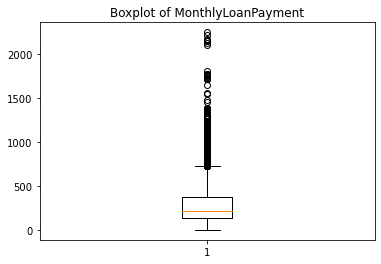

Column: OpenCreditLines, Number of outliers: 2516


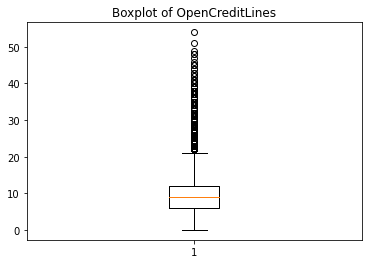

Column: OpenRevolvingAccounts, Number of outliers: 4481


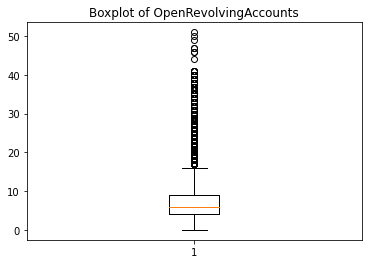

Column: OpenRevolvingMonthlyPayment, Number of outliers: 6743


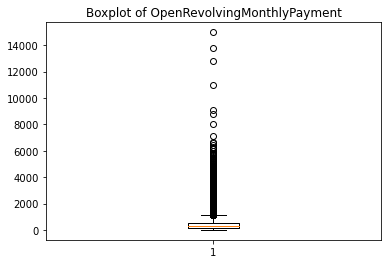

Column: PercentFunded, Number of outliers: 870


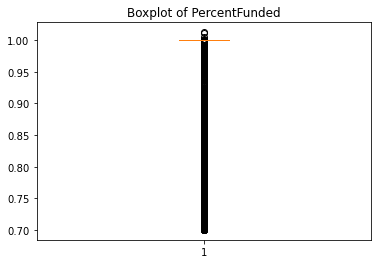

Column: ProsperScore, Number of outliers: 2448


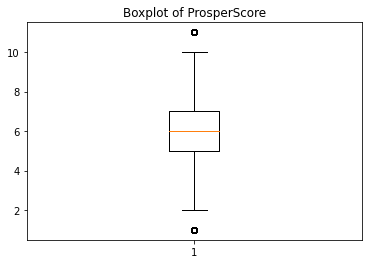

Column: PublicRecordsLast10Years, Number of outliers: 27437


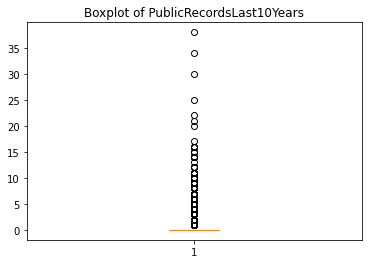

Column: PublicRecordsLast12Months, Number of outliers: 1392


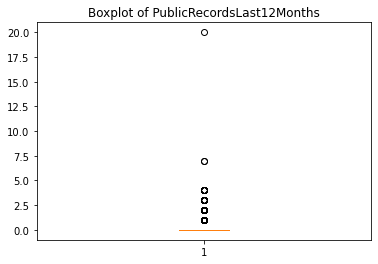

Column: Recommendations, Number of outliers: 4259


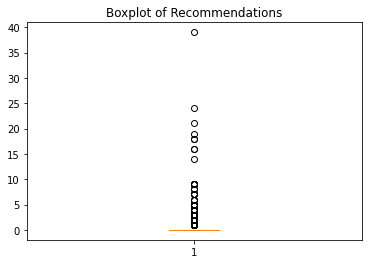

Column: RevolvingCreditBalance, Number of outliers: 10404


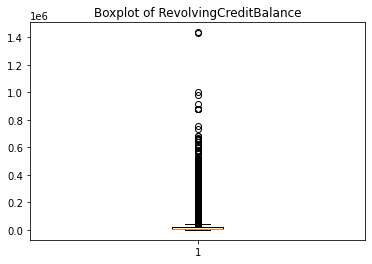

Column: StatedMonthlyIncome, Number of outliers: 5676


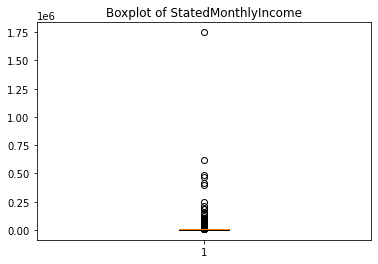

Column: Term, Number of outliers: 26159


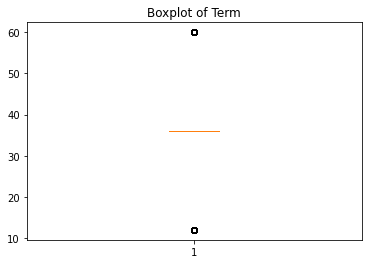

Column: TotalCreditLinespast7years, Number of outliers: 1706


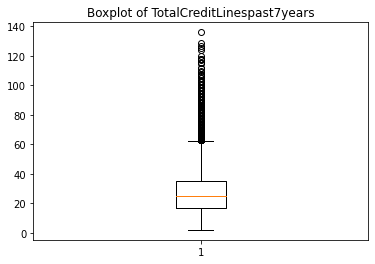

Column: TotalInquiries, Number of outliers: 7418


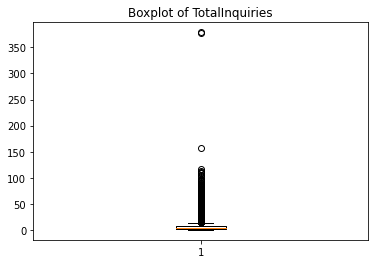

Column: TotalTrades, Number of outliers: 2568


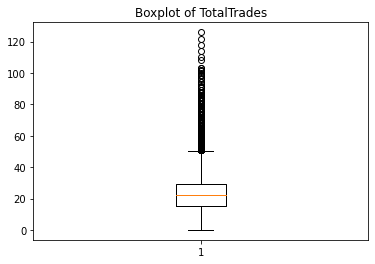

Column: TradesNeverDelinquent (percentage), Number of outliers: 4907


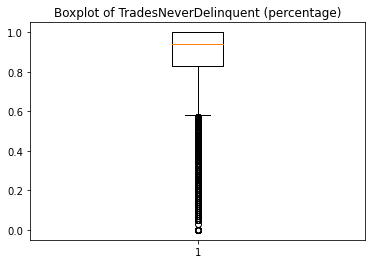

Column: TradesOpenedLast6Months, Number of outliers: 7489


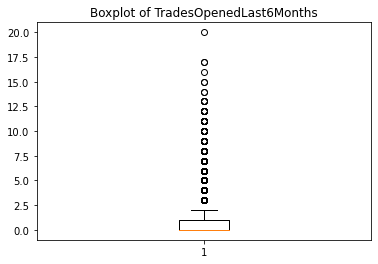

In [55]:
# Define a list of column names for which you want to detect outliers
columns_to_check = ['AmountDelinquent', 'AvailableBankcardCredit', 'BankcardUtilization', 'BorrowerAPR', 'BorrowerRate', 'ClosedDate', 'CreditGrade', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'CurrentDelinquencies', 'DebtToIncomeRatio', 'DelinquenciesLast7Years', 'EmploymentStatus', 'EmploymentStatusDuration', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'IncomeRange', 'InquiriesLast6Months', 'InvestmentFromFriendsAmount', 'InvestmentFromFriendsCount', 'Investors', 'LP_CollectionFees', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_GrossPrincipalLoss', 'LP_InterestandFees', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'LP_ServiceFees', 'LenderYield', 'ListingCategory (numeric)', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'LoanStatus', 'MonthlyLoanPayment', 'OpenCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'PercentFunded', 'ProsperScore', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'Recommendations', 'RevolvingCreditBalance', 'StatedMonthlyIncome', 'Term', 'TotalCreditLinespast7years', 'TotalInquiries', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months']

## There are two methods first The z-score method can be useful for detecting outliers in datasets that are normally distributed,
##but it may not be appropriate for datasets with non-normal distributions,

##so we will use here IQR Method

# Making a Loop through each column and detect outliers using IQR and boxplot
for column in columns_to_check:
    # Calculate the IQR for the column
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers detection
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Find the outliers in the column
    outliers = new_df[(new_df[column] > upper_bound) | (new_df[column] < lower_bound)]
    
    # Print the number of outliers found in the column
    print(f'Column: {column}, Number of outliers: {len(outliers)}')
    
   # Create a boxplot to visualize the distribution of the column
    plt.figure()
    plt.boxplot(new_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [56]:
# Check the size of the DataFrame
print("DataFrame shape:", new_df.shape)


DataFrame shape: (113937, 66)


In [57]:
# Calculate the IQR
Q1 = new_df["BorrowerAPR"].quantile(0.25)
Q2 = new_df["BorrowerAPR"].quantile(0.50)
Q3 = new_df["BorrowerAPR"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR :: ",IQR)

# Define the outlier threshold
lowertail = Q1 - (1.5 * IQR)
uppertail = Q3 + (1.5 * IQR)

print ("uppertail value ::", uppertail)
print ("lowertail value ::", lowertail)


IQR ::  0.12741
uppertail value :: 0.474815
lowertail value :: -0.03482499999999997


In [58]:
new_df['AvailableBankcardCredit'].describe()

count    113937.000000
mean      10739.442990
std       19232.447785
min           0.000000
25%        1017.000000
50%        4100.000000
75%       12078.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

<AxesSubplot:xlabel='LoanStatus', ylabel='BankcardUtilization'>

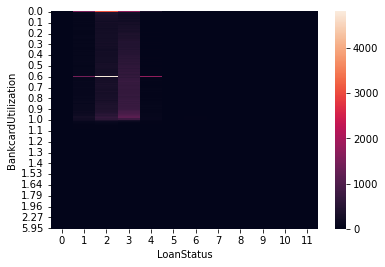

In [59]:
sns.heatmap(pd.crosstab(new_df['BankcardUtilization'],new_df['LoanStatus']))

In [60]:
# Important features for outliers detection

# ['AmountDelinquent',"BankcardUtilization","BorrowerAPR",'BorrowerRate','CreditGrade','CurrentDelinquencies','EmploymentStatus',
# 'EmploymentStatusDuration','LenderYield','LoanCurrentDaysDelinquent','LoanOriginalAmount','LoanStatus','MonthlyLoanPayment',
#  'ProsperScore']

<AxesSubplot:xlabel='LoanStatus', ylabel='BorrowerAPR'>

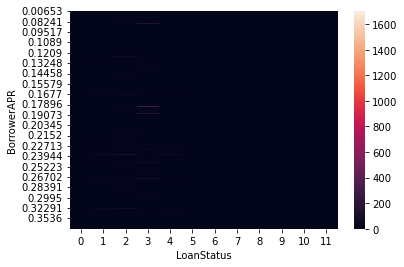

In [61]:
sns.heatmap(pd.crosstab(new_df['BorrowerAPR'],new_df['LoanStatus']))

* BankcardUtilization

In [62]:
# Using IQR Method removing ouliers


q1 = new_df["BankcardUtilization"].quantile(0.25)
q2 = new_df["BankcardUtilization"].quantile(0.50)
q3 = new_df["BankcardUtilization"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  0.48999999999999994
uppertail value >> 1.5549999999999997
lowertail value >> -0.40499999999999986


In [63]:
new_df['BankcardUtilization'].describe()

count    113937.000000
mean          0.563891
std           0.307278
min           0.000000
25%           0.330000
50%           0.600000
75%           0.820000
max           5.950000
Name: BankcardUtilization, dtype: float64

In [64]:
df.loc[(new_df["BankcardUtilization"] > uppertail)] 

ListingKey  ListingNumber            ListingCreationDate  \
2992    80E633868723781088BB36F         123056  2007-04-13 09:57:49.530000000   
5031    072F34211035943127AE822         334844  2008-05-18 12:34:02.220000000   
7646    2DA43398639141813D09F43         191465  2007-08-22 20:13:29.253000000   
9196    91FB3413819890177F00E09         285813  2008-02-28 14:14:57.853000000   
11972   69083385937761261F4EFA2         122294  2007-04-11 16:37:37.740000000   
14878   643334259017319496109DA         370839  2008-07-21 11:18:50.620000000   
16419   59063547729343978BF5EA8         587795  2012-05-09 19:58:33.467000000   
18620   68073426301349484E3E3CE         367757  2008-07-15 12:35:08.137000000   
21543   B0B23381255157157566D04          99866  2007-02-15 03:39:25.390000000   
26151   36EC3382872798525A762C2         105190  2007-03-01 14:48:41.990000000   
28051   D07A3406798894497ECDF08         241397  2007-11-30 17:25:20.223000000   
28115   6B7634759789904130FD134         447105  2010-02-19 05:23:11.390000000   
31515   3B4333887684803983B000E         132549  2007-05-04 05:24:49.313000000   
32777   31863392608835198736E30         154954  2007-06-19 19:11:30.347000000   
32845   FE7234045838467416E102A         222486  2007-10-28 16:27:37.907000000   
32913   31823424386322175762B4B         354634  2008-06-21 07:24:29.397000000   
35640   C0043429327291047A74AFF         385336  2008-08-19 17:53:26.410000000   
36326   9358340026676291457445D         207067  2007-09-26 08:28:37.603000000   
36461   38CD34256211984184B44F1         359264  2008-06-28 19:44:46.720000000   
37107   A0533433481413607F8D3F3         404265  2008-09-25 16:16:52.230000000   
39117   A09E3420425892193948846         335601  2008-05-19 19:26:05.910000000   
49673   A6AB34095988145803CAACA         261061  2008-01-07 08:26:15.800000000   
50013   FAF23421971413688051755         333561  2008-05-15 18:34:59.220000000   
50306   FC313402342074077641EF4         210348  2007-10-03 08:53:21.273000000   
51722   2037339331836643193004D         167610  2007-07-11 15:17:50.450000000   
53951   1EBF3395040499142DD3E41         177935  2007-07-28 22:33:41.927000000   
60997   3AED3395667435773958082         181651  2007-08-04 13:21:58.390000000   
63436   1D7E339031120900002A265         139390  2007-05-17 20:25:19.097000000   
65259   BB4E34191946516388AD563         310792  2008-04-15 05:35:10.670000000   
65752   C14F3420467385518B8DF90         323427  2008-05-01 14:08:54.850000000   
67184   96F73428873439805525492         382033  2008-08-13 08:03:03.160000000   
70752   75343382910194671475AAF         109387  2007-03-10 16:33:23.017000000   
71170   F95934267085363281552F7         369972  2008-07-19 09:57:16.500000000   
71777   EC263433481281877406F26         406295  2008-09-30 09:25:05.287000000   
75144   5BF93400019919765773047         205500  2007-09-23 03:43:48.843000000   
76070   FDD534190225333254F3888         326173  2008-05-05 11:36:07.753000000   
76462   D01834136856387036FCF35         278809  2008-02-12 09:07:02.417000000   
76773   4CE035298183583119BEC52         533868  2011-10-18 16:05:22.653000000   
76804   A1963536579930531B417BB         551360  2012-01-13 14:08:29.423000000   
78628   D8F834849166728155DA3A0         458471  2010-05-15 09:50:24.353000000   
82137   C6753398611652677D75BFB         198783  2007-09-07 09:49:03.960000000   
83609   222B3391750801402681034         151270  2007-06-12 22:20:49.247000000   
84202   A3EE34142741409433D2E14         287815  2008-03-04 07:47:06.333000000   
85400   EC563413422194274DEE1E5         282007  2008-02-20 04:41:50.937000000   
86204   EC083405210475888216CF4         227192  2007-11-06 11:49:57.443000000   
86591   6EF23413764357235F49516         287178  2008-03-03 05:29:22.160000000   
87275   5A933425666399931B234D5         360298  2008-07-01 06:13:00.043000000   
89611   272134175822068544A8888         301299  2008-03-29 09:32:00.447000000   
89878   8B183395218498773F238F4         174152  2007

In [65]:
df.loc[(new_df["BankcardUtilization"] < lowertail)]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

In [66]:
# finding data without ouliers
df.loc[(df["BankcardUtilization"]<=uppertail) & (new_df["BankcardUtilization"]>=lowertail)]

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
0                C    36               Completed  2009-08-14 00:00:00   
1              NaN    36                 Current                  NaN   
3              NaN    36                 Current                  NaN   
4              NaN    36                 Current                  NaN   
5              NaN    60                 Current                  NaN   
...            ...   ...                     ...                  ...   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0           0.16516        0.1580       0.1380                      NaN   
1           0.12016        0.0920       0.0820                  0.07960   
3           0.12528        0.0974       0.0874                  0.08490   
4           0.24614        0.2085       0.1985                  0.18316   
5           0.15425        0.1314       0.1214                  0.11567   
...             ...           ...          ...                      ...   
113932      0.22354        0.1864       0.1764                  0.16490   
113933      0.13220        0.1110       0.1010                  0.10070   
113934      0.23984        0.2150       0.2050                  0.18828   
113935      0.28408        0.2605       0.2505                  0.24450   
113936      0.13189        0.1039       0.0939                  0.09071   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0                 NaN              NaN                      NaN   
1              0.0249          0.05470                      6.0   
3              0.0249          0.06000                      6.0   
4              0.0925          0.09066                      3.0   
5              0.0449          0.07077                      5.0   
...               ...              ...                      ...   
113932         0.0699          0.09500                      4.0   
113933         0.0200          0.08070                      6.0   
113934         0.1025          0.08578                      3.0   
113935         0.0850          0.15950                      4.0   
113936         0.0299          0.06081                      6.0   

       ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
0                        NaN           NaN                          0   
1                          A           7.0                          2   
3                          A           9.0                         16   
4                          D           4.0                          2   
5                          B          10.0                          1   
...                      ..

In [67]:
mean_data = new_df.loc[(df["BankcardUtilization"]<=uppertail) & (new_df["BankcardUtilization"]>=lowertail),"BankcardUtilization"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

1

In [68]:
# outliers handling
df.loc[(new_df["BankcardUtilization"]>uppertail),"BankcardUtilization"] = mean_data

In [69]:
# Capping

In [70]:
IQR = q3-q1
print ("IQR  :: ",IQR)

IQR  ::  0.48999999999999994


In [71]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [72]:
new_df.BankcardUtilization = new_df.BankcardUtilization.apply(capping)

<AxesSubplot:xlabel='BankcardUtilization'>

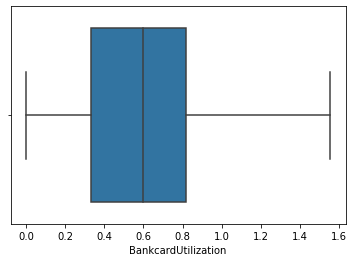

In [73]:
sns.boxplot(x = 'BankcardUtilization', data = new_df)

In [74]:
#######################################################################################3

* BorrowerAPR

<AxesSubplot:xlabel='BorrowerAPR'>

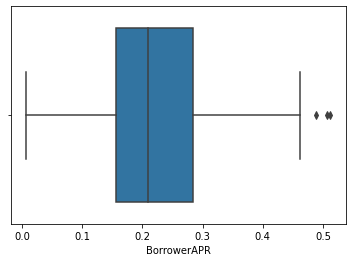

In [75]:
sns.boxplot(df['BorrowerAPR'])

In [76]:
q1 = new_df["BorrowerAPR"].quantile(0.25)
q2 = new_df["BorrowerAPR"].quantile(0.50)
q3 = new_df["BorrowerAPR"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  0.12741
uppertail value >> 0.474815
lowertail value >> -0.03482499999999997


In [77]:
new_df["BorrowerAPR"].describe()

count    113937.000000
mean          0.218826
std           0.080355
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283700
max           0.512290
Name: BorrowerAPR, dtype: float64

In [78]:
df.loc[(new_df["BorrowerAPR"] > uppertail)]

ListingKey  ListingNumber            ListingCreationDate  \
36018  844033650124564886B3EDC            690  2006-02-23 13:57:02.087000000   
56761  A79D33661366830833F3EF5           2231  2006-03-16 19:30:16.753000000   
82043  BBED336465905564254DC8B           1112  2006-03-02 19:00:17.593000000   

      CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
36018          HR    36  Completed  2006-03-14 00:00:00      0.51229   
56761          HR    36  Defaulted  2006-09-19 00:00:00      0.50633   
82043          HR    36  Defaulted  2006-09-05 00:00:00      0.48873   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
36018        0.4975       0.4925                      NaN            NaN   
56761        0.4975       0.4800                      NaN            NaN   
82043        0.4800       0.4750                      NaN            NaN   

       EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
36018              NaN                      NaN                   NaN   
56761              NaN                      NaN                   NaN   
82043              NaN                      NaN                   NaN   

       ProsperScore  ListingCategory (numeric) BorrowerState Occupation  \
36018           NaN                          0           NaN        NaN   
56761           NaN                          0           NaN        NaN   
82043           NaN                          0           NaN        NaN   

      EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
36018              NaN                       NaN                False   
56761              NaN                       NaN                False   
82043              NaN                       NaN                False   

       CurrentlyInGroup                 GroupKey  \
36018             False                      NaN   
56761             False  F555336594467179889CEFB   
82043             False                      NaN   

                    DateCreditPulled  CreditScoreRangeLower  \
36018  2006-02-23 13:57:02.087000000                    NaN   
56761  2006-03-16 18:39:30.963000000                    NaN   
82043  2006-03-02 11:32:57.040000000                    NaN   

       CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
36018                    NaN                     NaN                 NaN   
56761                    NaN                     NaN                 NaN   
82043                    NaN                     NaN                 NaN   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
36018              NaN                         NaN                      0   
56761              NaN                         NaN                      0   
82043              NaN                         NaN                      0   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
36018                          0.0                   NaN             NaN   
56761                          0.0                   NaN             NaN   
82043                          0.0                   NaN             NaN   

       CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
36018                   NaN               NaN                      NaN   
56761                   NaN               NaN                      NaN   
82043                   NaN               NaN                      NaN   

       PublicRecordsLast10Years  PublicRecordsLast12Months  \
36018                       NaN                        NaN   
56761                       NaN                        NaN   
82043                       NaN                        NaN   

       RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
36018                     NaN                  NaN                      NaN   
56761                     NaN                  NaN                      NaN   
82043                     NaN                  NaN    

In [79]:
df.loc[(new_df["BorrowerAPR"] < lowertail)] 

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

In [80]:
# finding data without ouliers
new_df.loc[(new_df["BorrowerAPR"]<=uppertail) & (new_df["BorrowerAPR"]>=lowertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
0                     14183            3    36           2        1136   
1                    111893            3    36           3        2795   
2                      6428            6    36           2        1261   
3                     64759            3    36           3        2795   
4                     85966            3    36           3        2795   
...                     ...          ...   ...         ...         ...   
113932                72653            3    36           3        2795   
113933                45730            3    36           5        2795   
113934               100155            3    60           3        2795   
113935                46133            3    60           2        2592   
113936               105292            3    36           3        2795   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0           0.16516        0.1580       0.1380                  0.16150   
1           0.12016        0.0920       0.0820                  0.07960   
2           0.28269        0.2750       0.2400                  0.16150   
3           0.12528        0.0974       0.0874                  0.08490   
4           0.24614        0.2085       0.1985                  0.18316   
...             ...           ...          ...                      ...   
113932      0.22354        0.1864       0.1764                  0.16490   
113933      0.13220        0.1110       0.1010                  0.10070   
113934      0.23984        0.2150       0.2050                  0.18828   
113935      0.28408        0.2605       0.2505                  0.24450   
113936      0.13189        0.1039       0.0939                  0.09071   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0              0.0724          0.09170                      4.0   
1              0.0249          0.05470                      6.0   
2              0.0724          0.09170                      4.0   
3              0.0249          0.06000                      6.0   
4              0.0925          0.09066                      3.0   
...               ...              ...                      ...   
113932         0.0699          0.09500                      4.0   
113933         0.0200          0.08070                      6.0   
113934         0.1025          0.08578                      3.0   
113935         0.0850          0.15950                      4.0   
113936         0.0299          0.06081                      6.0   

        ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
0                           3           6.0                          0   
1                           0           7.0                          2   
2                           3           6.0                          0   
3                           0           9.0                         16   
4                           4           4.0                          2   
...                       ...           ...                        ...   
113932                      3           5.0                          1   
113933                      0           8.0                          7   
113934                      4           3.0                          1   
113935                      3           5.0                          2   
113936                      0           7.0                          1   

        BorrowerState  Occupation  EmploymentStatus  EmploymentStatusDuration  \
0                   5          35                 7                       2.0   
1                   5          41                 0                      44.0   
2                  10          35                 2                      67.0   
3                  10          50                 0                     113.0   
4                  23          19                 0                      44.0   
...               ...         ...     

In [81]:
mean_data = new_df.loc[(new_df["BorrowerAPR"]<=uppertail) & (new_df["BorrowerAPR"]>=lowertail),"BorrowerAPR"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

1

In [82]:
# outliers handling
new_df.loc[(new_df["BorrowerAPR"]>uppertail),"BorrowerAPR"] = mean_data

In [83]:
new_df.loc[(new_df["BorrowerAPR"] > uppertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
36018                  111            6    36           2           9   
56761                  272            6    36           4          85   
82043                  166            6    36           4          77   

       BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
36018          1.0        0.4975       0.4925                   0.1615   
56761          1.0        0.4975       0.4800                   0.1615   
82043          1.0        0.4800       0.4750                   0.1615   

       EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
36018         0.0724           0.0917                      4.0   
56761         0.0724           0.0917                      4.0   
82043         0.0724           0.0917                      4.0   

       ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
36018                      3           6.0                          0   
56761                      3           6.0                          0   
82043                      3           6.0                          0   

       BorrowerState  Occupation  EmploymentStatus  EmploymentStatusDuration  \
36018              4          35                 0                      67.0   
56761              4          35                 0                      67.0   
82043              4          35                 0                      67.0   

       IsBorrowerHomeowner  CurrentlyInGroup  DateCreditPulled  \
36018                False             False               143   
56761                False             False               301   
82043                False             False               204   

       CreditScoreRangeLower  CreditScoreRangeUpper  FirstRecordedCreditLine  \
36018                  680.0                  699.0                     5782   
56761                  680.0                  699.0                     5782   
82043                  680.0                  699.0                     5782   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
36018                10.0              9.0                        25.0   
56761                10.0              9.0                        25.0   
82043                10.0              9.0                        25.0   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
36018                      0                          0.0   
56761                      0                          0.0   
82043                      0                          0.0   

       InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  \
36018                   1.0             4.0                   0.0   
56761                   1.0             4.0                   0.0   
82043                   1.0             4.0                   0.0   

       AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  \
36018               0.0                      0.0                       0.0   
56761               0.0                      0.0                       0.0   
82043               0.0                      0.0                       0.0   

       PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
36018                        0.0                  8549.0                  0.6   
56761                        0.0                  8549.0                  0.6   
82043                        0.0                  8549.0                  0.6   

       AvailableBankcardCredit  TotalTrades  \
36018                   4100.0         22.0   
56761                   4100.0         22.0   
82043                   4100.0         22.0   

       TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
36018                                0.94                      0.0   
56761                                0.94                      0.0   
82043                                0.94                      0.0   

       DebtToIncomeRatio 

In [84]:
# Capping

IQR = q3-q1
print ("IQR  :: ",IQR)

IQR  ::  0.12741


In [85]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [86]:
new_df.BorrowerAPR = new_df.BorrowerAPR.apply(capping)

<AxesSubplot:xlabel='BorrowerAPR'>

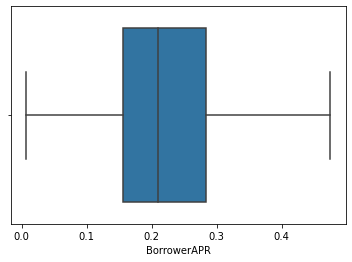

In [87]:
sns.boxplot(x = 'BorrowerAPR', data = new_df)

In [88]:
#############################################################

* BorrowerRate

<AxesSubplot:xlabel='BorrowerRate'>

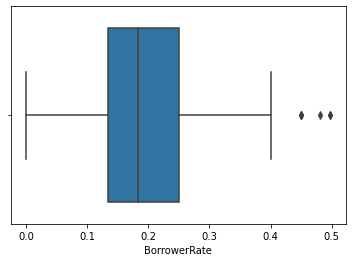

In [89]:
sns.boxplot(new_df['BorrowerRate'])

In [90]:
q1 = new_df["BorrowerRate"].quantile(0.25)
q2 = new_df["BorrowerRate"].quantile(0.50)
q3 = new_df["BorrowerRate"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  0.11599999999999999
uppertail value >> 0.424
lowertail value >> -0.03999999999999998


In [91]:
new_df["BorrowerRate"].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [92]:
new_df.loc[(new_df["BorrowerRate"] > uppertail)] 

ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
18326                   231            6    36           4         184   
22195                   235            6    36           1         956   
36018                   111            6    36           2           9   
56761                   272            6    36           4          85   
82043                   166            6    36           4          77   
103973                  187            6    36           4          98   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
18326      0.458570        0.4500       0.4325                   0.1615   
22195      0.462010        0.4500       0.4325                   0.1615   
36018      0.474815        0.4975       0.4925                   0.1615   
56761      0.474815        0.4975       0.4800                   0.1615   
82043      0.474815        0.4800       0.4750                   0.1615   
103973     0.458570        0.4500       0.4325                   0.1615   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
18326          0.0724           0.0917                      4.0   
22195          0.0724           0.0917                      4.0   
36018          0.0724           0.0917                      4.0   
56761          0.0724           0.0917                      4.0   
82043          0.0724           0.0917                      4.0   
103973         0.0724           0.0917                      4.0   

        ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
18326                       3           6.0                          0   
22195                       3           6.0                          0   
36018                       3           6.0                          0   
56761                       3           6.0                          0   
82043                       3           6.0                          0   
103973                      3           6.0                          0   

        BorrowerState  Occupation  EmploymentStatus  EmploymentStatusDuration  \
18326               4          35                 0                      67.0   
22195               4          35                 0                      67.0   
36018               4          35                 0                      67.0   
56761               4          35                 0                      67.0   
82043               4          35                 0                      67.0   
103973              4          35                 0                      67.0   

        IsBorrowerHomeowner  CurrentlyInGroup  DateCreditPulled  \
18326                 False             False               125   
22195                 False             False               273   
36018                 False             False               143   
56761                 False             False               301   
82043                 False             False               204   
103973                False             False               216   

        CreditScoreRangeLower  CreditScoreRangeUpper  FirstRecordedCreditLine  \
18326                   680.0                  699.0                     5782   
22195                   680.0                  699.0                     5782   
36018                   680.0                  699.0                     5782   
56761                   680.0                  699.0                     5782   
82043                   680.0                  699.0                     5782   
103973                  680.0                  699.0                     5782   

        CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
18326                 10.0              9.0                        25.0   
22195                 10.0              9.0                        25.0   
36018                 10.0              9.0                        25.0   
56761                 10.0              9.0                        2

In [93]:
new_df.loc[(new_df["BorrowerRate"] < lowertail)] 

Empty DataFrame
Columns: [ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanCurrentDaysDelinquent, LoanMonthsSinceOrigination, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

In [94]:
# finding data without ouliers
new_df.loc[(new_df["BorrowerRate"]<=uppertail) & (new_df["BorrowerRate"]>=lowertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
0                     14183            3    36           2        1136   
1                    111893            3    36           3        2795   
2                      6428            6    36           2        1261   
3                     64759            3    36           3        2795   
4                     85966            3    36           3        2795   
...                     ...          ...   ...         ...         ...   
113932                72653            3    36           3        2795   
113933                45730            3    36           5        2795   
113934               100155            3    60           3        2795   
113935                46133            3    60           2        2592   
113936               105292            3    36           3        2795   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0           0.16516        0.1580       0.1380                  0.16150   
1           0.12016        0.0920       0.0820                  0.07960   
2           0.28269        0.2750       0.2400                  0.16150   
3           0.12528        0.0974       0.0874                  0.08490   
4           0.24614        0.2085       0.1985                  0.18316   
...             ...           ...          ...                      ...   
113932      0.22354        0.1864       0.1764                  0.16490   
113933      0.13220        0.1110       0.1010                  0.10070   
113934      0.23984        0.2150       0.2050                  0.18828   
113935      0.28408        0.2605       0.2505                  0.24450   
113936      0.13189        0.1039       0.0939                  0.09071   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0              0.0724          0.09170                      4.0   
1              0.0249          0.05470                      6.0   
2              0.0724          0.09170                      4.0   
3              0.0249          0.06000                      6.0   
4              0.0925          0.09066                      3.0   
...               ...              ...                      ...   
113932         0.0699          0.09500                      4.0   
113933         0.0200          0.08070                      6.0   
113934         0.1025          0.08578                      3.0   
113935         0.0850          0.15950                      4.0   
113936         0.0299          0.06081                      6.0   

        ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
0                           3           6.0                          0   
1                           0           7.0                          2   
2                           3           6.0                          0   
3                           0           9.0                         16   
4                           4           4.0                          2   
...                       ...           ...                        ...   
113932                      3           5.0                          1   
113933                      0           8.0                          7   
113934                      4           3.0                          1   
113935                      3           5.0                          2   
113936                      0           7.0                          1   

        BorrowerState  Occupation  EmploymentStatus  EmploymentStatusDuration  \
0                   5          35                 7                       2.0   
1                   5          41                 0                      44.0   
2                  10          35                 2                      67.0   
3                  10          50                 0                     113.0   
4                  23          19                 0                      44.0   
...               ...         ...     

In [95]:
mean_data = new_df.loc[(df["BorrowerRate"]<=uppertail) & (new_df["BorrowerRate"]>=lowertail),"BorrowerRate"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

1

In [96]:
# outliers handling
new_df.loc[(new_df["BorrowerRate"]>uppertail),"BorrowerRate"] = mean_data

In [97]:
new_df.loc[(new_df["BorrowerRate"] > uppertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
18326                   231            6    36           4         184   
22195                   235            6    36           1         956   
36018                   111            6    36           2           9   
56761                   272            6    36           4          85   
82043                   166            6    36           4          77   
103973                  187            6    36           4          98   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
18326      0.458570           1.0       0.4325                   0.1615   
22195      0.462010           1.0       0.4325                   0.1615   
36018      0.474815           1.0       0.4925                   0.1615   
56761      0.474815           1.0       0.4800                   0.1615   
82043      0.474815           1.0       0.4750                   0.1615   
103973     0.458570           1.0       0.4325                   0.1615   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
18326          0.0724           0.0917                      4.0   
22195          0.0724           0.0917                      4.0   
36018          0.0724           0.0917                      4.0   
56761          0.0724           0.0917                      4.0   
82043          0.0724           0.0917                      4.0   
103973         0.0724           0.0917                      4.0   

        ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
18326                       3           6.0                          0   
22195                       3           6.0                          0   
36018                       3           6.0                          0   
56761                       3           6.0                          0   
82043                       3           6.0                          0   
103973                      3           6.0                          0   

        BorrowerState  Occupation  EmploymentStatus  EmploymentStatusDuration  \
18326               4          35                 0                      67.0   
22195               4          35                 0                      67.0   
36018               4          35                 0                      67.0   
56761               4          35                 0                      67.0   
82043               4          35                 0                      67.0   
103973              4          35                 0                      67.0   

        IsBorrowerHomeowner  CurrentlyInGroup  DateCreditPulled  \
18326                 False             False               125   
22195                 False             False               273   
36018                 False             False               143   
56761                 False             False               301   
82043                 False             False               204   
103973                False             False               216   

        CreditScoreRangeLower  CreditScoreRangeUpper  FirstRecordedCreditLine  \
18326                   680.0                  699.0                     5782   
22195                   680.0                  699.0                     5782   
36018                   680.0                  699.0                     5782   
56761                   680.0                  699.0                     5782   
82043                   680.0                  699.0                     5782   
103973                  680.0                  699.0                     5782   

        CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
18326                 10.0              9.0                        25.0   
22195                 10.0              9.0                        25.0   
36018                 10.0              9.0                        25.0   
56761                 10.0              9.0                        2

In [98]:
# Capping

IQR = q3-q1
print ("IQR  :: ",IQR)

IQR  ::  0.11599999999999999


In [99]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [100]:
new_df.BorrowerRate = new_df.BorrowerRate.apply(capping)

<AxesSubplot:xlabel='BorrowerRate'>

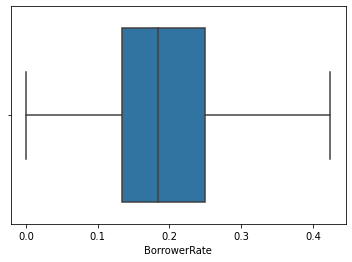

In [101]:
sns.boxplot(x = 'BorrowerRate', data = new_df)

In [102]:
###############################################################

*'CurrentDelinquencies'

<AxesSubplot:xlabel='CurrentDelinquencies'>

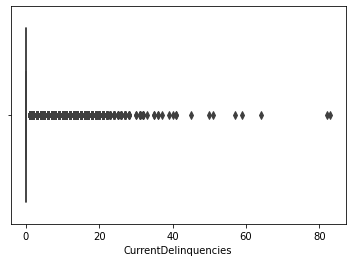

In [103]:
sns.boxplot(new_df['CurrentDelinquencies'])

In [104]:
# ['AmountDelinquent',"BankcardUtilization","BorrowerAPR",'BorrowerRate','CreditGrade','CurrentDelinquencies','EmploymentStatus',
# 'EmploymentStatusDuration','LenderYield','LoanCurrentDaysDelinquent','LoanOriginalAmount','LoanStatus','MonthlyLoanPayment',
#  'ProsperScore']

In [105]:
# List of numerical columns to check for outliers
numerical_columns = ['CurrentDelinquencies','EmploymentStatus','LenderYield','LoanCurrentDaysDelinquent','LoanOriginalAmount','MonthlyLoanPayment','ProsperScore']

# Loop through each numerical column
for column in numerical_columns:
    # Calculate the IQR for the current column
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lowertail = Q1 - 1.5 * IQR
    uppertail = Q3 + 1.5 * IQR
    
    # Identify and remove outliers
    outliers = new_df.loc[(new_df[column]<=uppertail) & (new_df[column]>=lowertail)]
    new_df.drop(outliers.index, axis=0)
    
    mean_data = new_df.loc[(new_df[column]<=uppertail) & (new_df[column]>=lowertail),column].mean()
    mean_data = int(np.ceil(mean_data))
    
    # outliers handling
    new_df.loc[(new_df[column]>uppertail),column] = mean_data
    
    

# Print the cleaned DataFrame
print(new_df)
mean_data


        ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
0                     14183            3    36           2        1136   
1                    111893            3    36           3        2795   
2                      6428            6    36           2        1261   
3                     64759            3    36           3        2795   
4                     85966            3    36           3        2795   
...                     ...          ...   ...         ...         ...   
113932                72653            3    36           3        2795   
113933                45730            3    36           5        2795   
113934               100155            3    60           3        2795   
113935                46133            3    60           2        2592   
113936               105292            3    36           3        2795   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0           0.16516        0.1580   

6

In [106]:
# Capping

IQR = q3-q1
print ("IQR  :: ",IQR) 

IQR  ::  0.11599999999999999


In [107]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [108]:
new_df.CurrentDelinquencies = new_df.CurrentDelinquencies.apply(capping)

<AxesSubplot:xlabel='CurrentDelinquencies'>

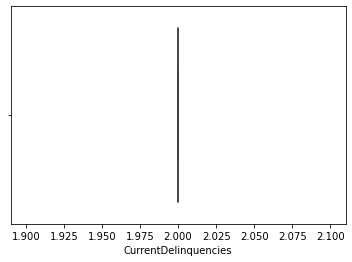

In [109]:
sns.boxplot(x = 'CurrentDelinquencies', data = new_df)

<AxesSubplot:xlabel='EmploymentStatus'>

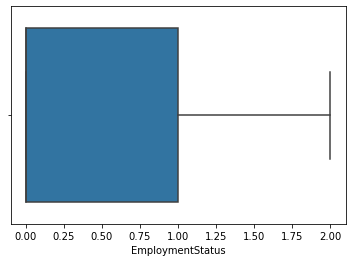

In [110]:
sns.boxplot(x = 'EmploymentStatus', data = new_df)

In [111]:
new_df.LenderYield = new_df.LenderYield.apply(capping)

<AxesSubplot:xlabel='LenderYield'>

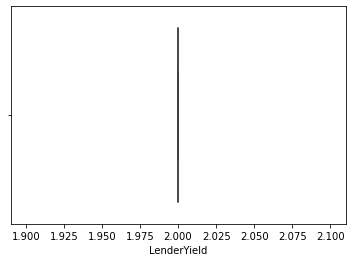

In [112]:
sns.boxplot(x = 'LenderYield', data = new_df)

In [113]:
new_df.LoanCurrentDaysDelinquent = new_df.LoanCurrentDaysDelinquent.apply(capping)

<AxesSubplot:xlabel='LoanCurrentDaysDelinquent'>

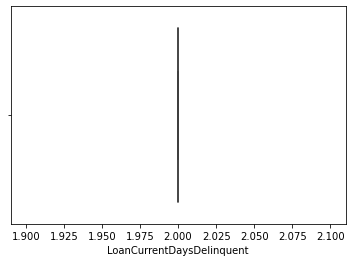

In [114]:
sns.boxplot(x = 'LoanCurrentDaysDelinquent', data = new_df)

In [115]:
new_df.LoanOriginalAmount = new_df.LoanOriginalAmount.apply(capping)

<AxesSubplot:xlabel='LoanOriginalAmount'>

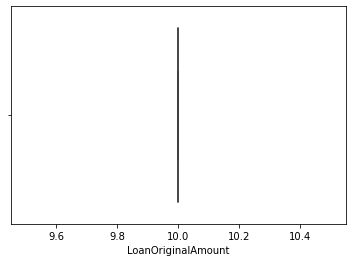

In [116]:
sns.boxplot(x = 'LoanOriginalAmount', data = new_df)

In [117]:
df.MonthlyLoanPayment = new_df.MonthlyLoanPayment.apply(capping)

<AxesSubplot:xlabel='MonthlyLoanPayment'>

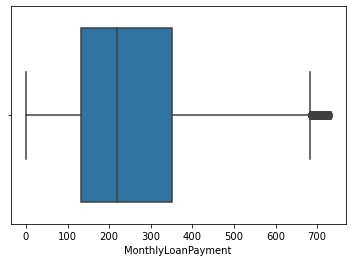

In [118]:
sns.boxplot(x = 'MonthlyLoanPayment', data = new_df)

In [119]:
new_df.ProsperScore = new_df.ProsperScore.apply(capping)

<AxesSubplot:xlabel='ProsperScore'>

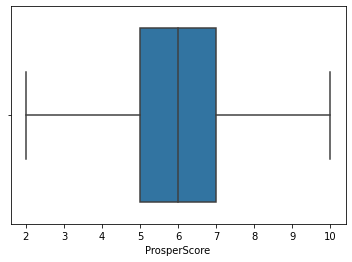

In [120]:
sns.boxplot(x = 'ProsperScore', data = new_df)

In [121]:
# checking final output of removed outliers from selected columns 
# ['BorrowerAPR','BankcardUtilization','BorrowerRate','CurrentDelinquencies','EmploymentStatus','LenderYield',
#'LoanCurrentDaysDelinquent','LoanOriginalAmount','MonthlyLoanPayment','ProsperScore']

outliers_columns.value_counts()

True     53
False    13
dtype: int64

#### 4- Mutual Information and Feautre Selection

In [122]:
### Train test split
X = new_df.drop(columns='LoanStatus', axis=1)
Y = new_df['LoanStatus']
### Splitting the data into training data & Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
print(X.shape, X_train.shape, X_test.shape)


(113937, 65) (79755, 65) (34182, 65)


In [123]:
from sklearn.feature_selection import mutual_info_regression

# Identify discrete features
discrete_features = X.dtypes == int

# Define function to compute MI scores
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X,Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="Mutual Information Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Compute MI scores
mi_scores = make_mi_scores(X, Y, discrete_features)

# Show top features with MI scores
print(mi_scores[::10])

ClosedDate               0.748733
LP_GrossPrincipalLoss    0.415178
LP_ServiceFees           0.137683
BankcardUtilization      0.073541
TotalInquiries           0.045308
Occupation               0.014318
LoanOriginalAmount       0.001062
Name: Mutual Information Scores, dtype: float64


In [124]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.47004164, 0.19331717, 0.07880744, 0.75435216, 0.44081924,
       0.37096308, 0.00577913, 0.44099585, 0.39555527, 0.44909835,
       0.09740408, 0.09558276, 0.12623981, 0.18481915, 0.0235334 ,
       0.01983058, 0.16930506, 0.05981466, 0.00717838, 0.06434206,
       0.47148201, 0.09878491, 0.09947334, 0.02111724, 0.03735246,
       0.03976167, 0.01804429, 0.0400776 , 0.06422612, 0.05280748,
       0.04713964, 0.00712095, 0.00582956, 0.0064877 , 0.00542789,
       0.00193171, 0.08815971, 0.06971081, 0.08265628, 0.04449817,
       0.05205689, 0.00882704, 0.02286012, 0.07705677, 0.00748835,
       0.03042788, 0.00610606, 0.46506258, 0.00894252, 0.47191739,
       0.46170451, 0.26907071, 0.29440282, 0.58842718, 0.11987049,
       0.13155516, 0.06704621, 0.41471   , 0.41082705, 0.06073679,
       0.006462  , 0.01542924, 0.0133307 , 0.00922443, 0.14671879])

In [125]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ClosedDate                            0.754352
LP_CustomerPrincipalPayments          0.588427
LoanOriginationDate                   0.471917
DateCreditPulled                      0.471482
ListingCreationDate                   0.470042
LoanMonthsSinceOrigination            0.465063
LoanOriginationQuarter                0.461705
EstimatedReturn                       0.449098
EstimatedEffectiveYield               0.440996
BorrowerAPR                           0.440819
LP_GrossPrincipalLoss                 0.414710
LP_NetPrincipalLoss                   0.410827
EstimatedLoss                         0.395555
BorrowerRate                          0.370963
LP_CustomerPayments                   0.294403
MonthlyLoanPayment                    0.269071
CreditGrade                           0.193317
ListingCategory (numeric)             0.184819
EmploymentStatus                      0.169305
Investors                             0.146719
LP_ServiceFees                        0.131555
ProsperScore 

<AxesSubplot:>

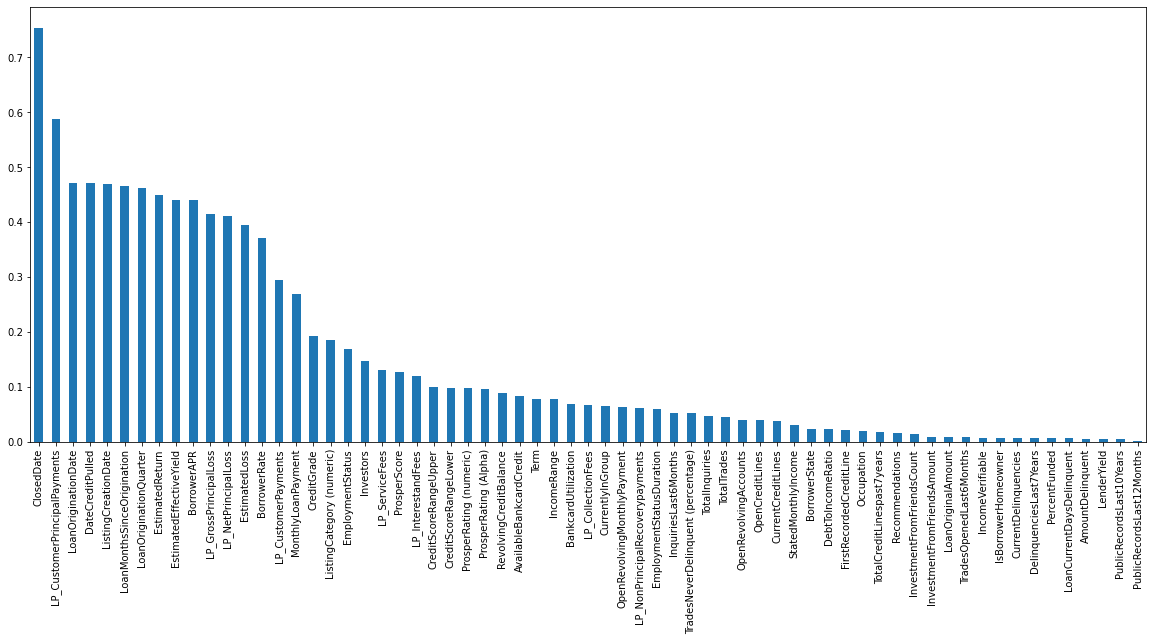

In [126]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [127]:
from sklearn.feature_selection import SelectKBest

In [128]:
#Now we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ListingCreationDate', 'ClosedDate', 'DateCreditPulled',
       'LoanOriginationDate', 'LP_CustomerPrincipalPayments'],
      dtype='object')

In [129]:
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)

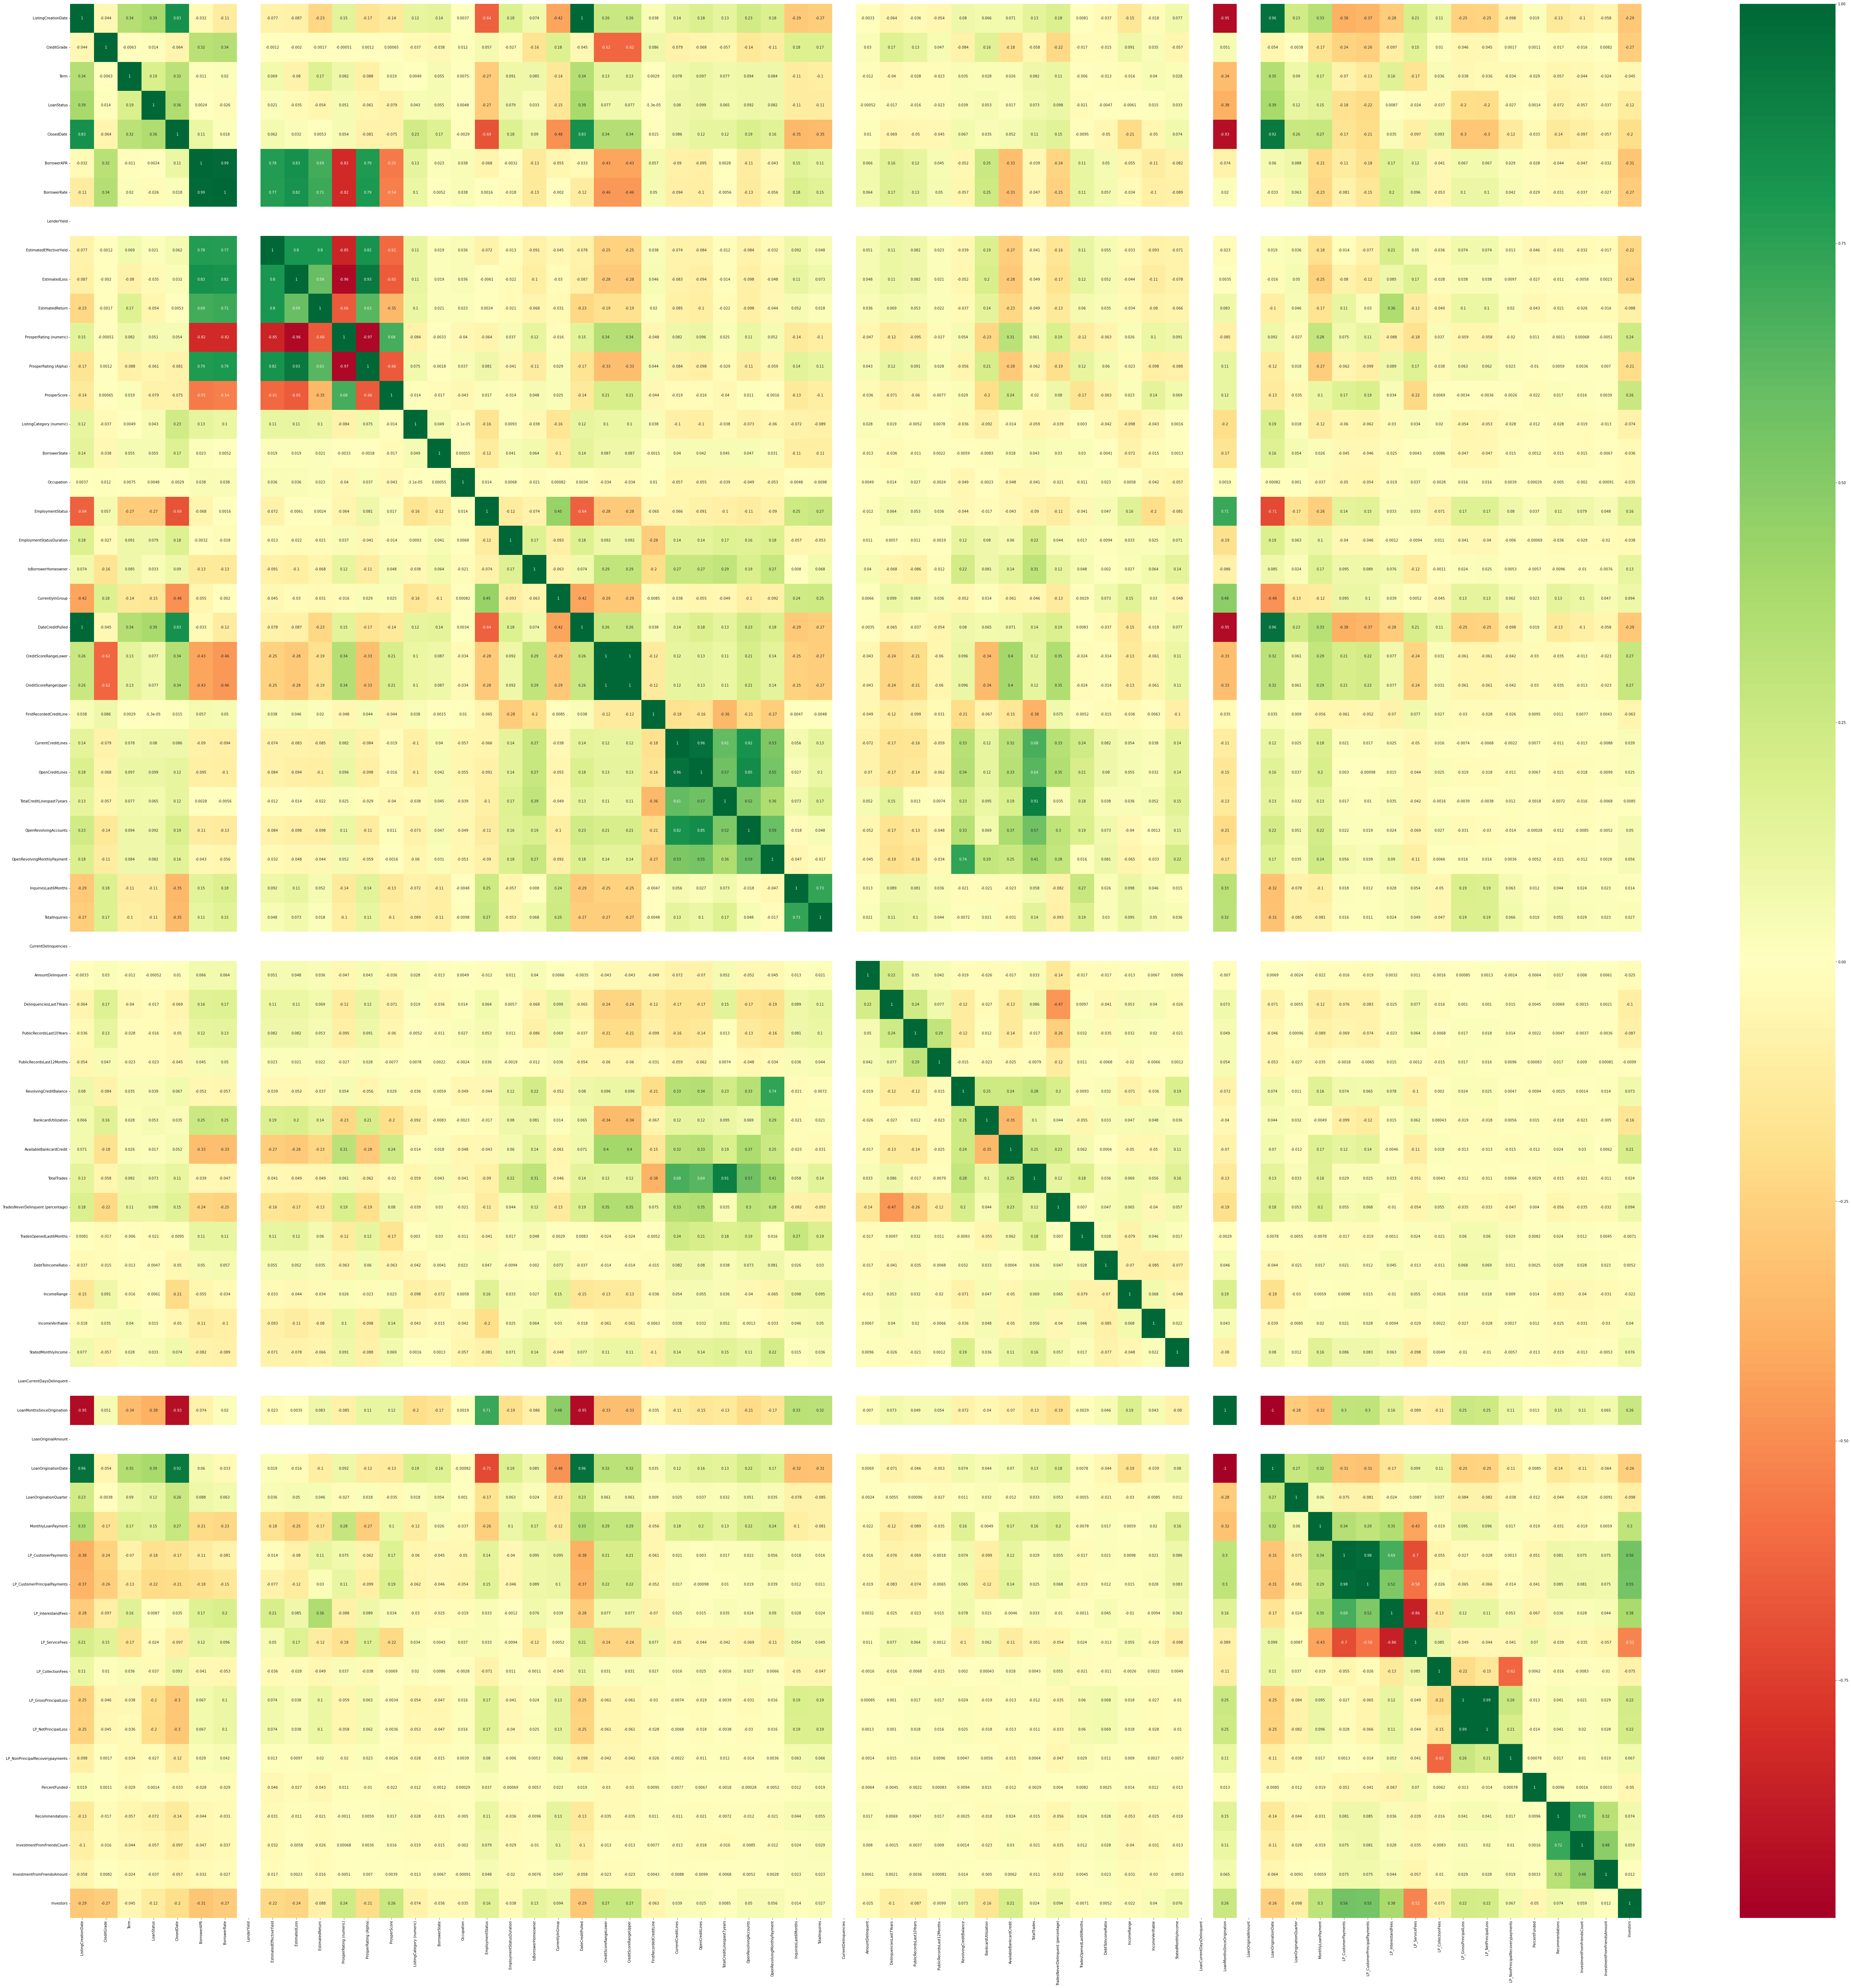

In [130]:
X = new_df.iloc[:,0:20]  #independent columns
y = new_df.iloc[:,-1]    #target column i.e LoanStatus
#get correlations of each features in dataset
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))
#plot heat map
g=sns.heatmap(new_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### 5.1 Standardization Method

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the tarin set, it will learn the parameters
scaler.fit(X_train)

# transform train and test datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
scaler.mean_

array([ 5.68396386e+04,  3.01474516e+00,  4.08406244e+01,  2.26775471e+03,
        2.18752712e-01,  1.92685151e-01,  2.00000000e+00,  1.66722419e-01,
        7.82585644e-02,  9.49002485e-02,  4.05567049e+00,  2.86358222e+00,
        5.90697762e+00,  2.77561281e+00,  2.17392640e+01,  3.15586734e+01,
        4.34781518e-01,  9.41076672e+01,  5.03780327e-01,  1.11792364e-01,
        5.68500184e+04,  6.85449940e+02,  7.04449940e+02,  6.24431439e+03,
        1.03017616e+01,  9.24902514e+00,  2.67842643e+01,  6.96923077e+00,
        3.97883568e+02,  1.43435521e+00,  5.56363864e+00,  2.00000000e+00,
        9.43844060e+02,  4.16006520e+00,  3.12268823e-01,  1.36793931e-02,
        1.70083377e+04,  5.63618080e-01,  1.08205861e+04,  2.31731177e+01,
        8.89409943e-01,  7.50435709e-01,  2.71466351e-01,  3.50897122e+00,
        9.24456147e-01,  5.62247797e+03,  2.00000000e+00,  3.18688734e+01,
        1.00000000e+01,  1.25680307e+03,  1.74126136e+01,  2.53380992e+02,
        4.17386933e+03,  

In [133]:
# convert X_train_scaled into DataFrame because scaled output is an arry form so i need to visualize in the form of dataframe
 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [134]:
X_train_scaled

ListingCreationDate  CreditGrade      Term  ClosedDate  BorrowerAPR  \
0                -1.183030    -1.083528 -0.463141   -0.765470     1.081345   
1                -0.626548    -0.015745 -0.463141    0.295172     0.620866   
2                -1.253045    -1.083528 -0.463141   -2.050247    -0.141911   
3                -1.341597     1.052038 -0.463141   -1.364499    -0.148258   
4                 1.589899    -0.015745  1.833130    0.703419    -1.076310   
...                    ...          ...       ...         ...          ...   
79750             1.019530    -0.015745  1.833130    0.703419     0.771953   
79751             0.214706    -0.015745 -0.463141    0.703419    -1.226525   
79752            -1.271276     1.052038 -0.463141   -0.937574     0.233068   
79753            -1.692499     3.187605 -0.463141   -2.194334     0.589753   
79754             0.955969    -0.015745 -0.463141    0.703419     0.067171   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0          1.300939          0.0                -0.088201      -0.144359   
1          0.552311          0.0                -0.591490       0.215395   
2          0.097787          0.0                -0.088201      -0.144359   
3          0.091103          0.0                -0.088201      -0.144359   
4         -1.106701          0.0                -1.189696      -1.129988   
...             ...          ...                      ...            ...   
79750      0.831710          0.0                 0.959249       1.090141   
79751     -1.340647          0.0                -1.461269      -1.376395   
79752      0.498838          0.0                -0.088201      -0.144359   
79753      0.732784          0.0                -0.088201      -0.144359   
79754     -0.076001          0.0                -0.034494      -0.021156   

       EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0            -0.121641                -0.038479               0.086602   
1             1.398758                -0.038479               0.086602   
2            -0.121641                -0.038479               0.086602   
3            -0.121641                -0.038479               0.086602   
4            -1.179080                 1.343918              -1.817883   
...                ...                      ...                    ...   
79750         0.232612                -1.420877               1.356259   
79751        -1.410180                 1.343918              -1.817883   
79752        -0.121641                -0.038479               0.086602   
79753        -0.121641                -0.038479               0.086602   
79754        -0.289646                -0.038479               0.086602   

       ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0          0.047690                  -0.444258      -1.174636    1.682649   
1          0.047690                  -0.444258       0.811866   -1.873799   
2          0.047690                  -0.694458      -1.174636   -1.935117   
3          0.047690                  -0.694458      -0.777335    2.111876   
4          1.073040                   1.056941      -0.512469   -1.873799   
...             ...                        ...            ...         ...   
79750      0.047690                   0.056142      -0.512469    0.211016   
79751      2.098389                   2.558140       0.811866    0.517606   
79752      0.047690                  -0.694458      -0.512469   -1.260618   
79753      0.047690                  -0.694458      -1.174636    0.211016   
79754     -0.977659                  -0.194058       1.341599   -0.831392   

       EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0              0.970437                  2.430461             0.992468   
1             -0.746487                 -0.960743             0.992468   
2              0.970437                 -0.895318             0.992468   
3              0.970437                 -0.5900

In [135]:
X_test_scaled

ListingCreationDate  CreditGrade      Term  ClosedDate  BorrowerAPR  \
0                -1.414854    -0.015745 -0.463141   -1.791424    -0.141911   
1                 1.472014    -0.015745  1.833130    0.703419    -0.088271   
2                 0.298639    -0.015745 -0.463141    0.703419     1.732611   
3                 1.427876    -0.015745  1.833130    0.703419    -0.610604   
4                 0.926697    -0.015745  1.833130    0.670066     0.466668   
...                    ...          ...       ...         ...          ...   
34177             1.123192    -0.015745  1.833130    0.703419    -0.457775   
34178             0.055344    -0.015745 -0.463141    0.445930     1.732611   
34179            -1.257634    -1.083528 -0.463141   -0.918896    -0.141911   
34180            -0.307181    -0.015745 -0.463141   -0.254494    -0.359581   
34181            -0.673867    -0.015745 -0.463141    0.376555    -0.387956   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0          0.097787          0.0                -0.088201      -0.144359   
1         -0.069317          0.0                -0.035339       0.102048   
2          1.671242          0.0                 1.911446       2.198973   
3         -0.617419          0.0                -0.637428      -0.575572   
4          0.512206          0.0                 0.606271       0.720530   
...             ...          ...                      ...            ...   
34177     -0.456999          0.0                -0.449961      -0.513970   
34178      1.671242          0.0                 2.075268       2.137371   
34179      0.097787          0.0                -0.088201      -0.144359   
34180     -0.424915          0.0                -0.311135      -0.647030   
34181     -0.684261          0.0                -2.467848       0.732850   

       EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0            -0.121641                -0.038479               0.086602   
1            -0.481596                -0.038479               0.086602   
2             0.665166                -2.112075               1.991087   
3            -0.791378                 0.652719              -0.548226   
4             0.008353                -0.729678               0.721430   
...                ...                      ...                    ...   
34177        -0.464492                 0.652719              -0.548226   
34178         1.128887                -2.112075               1.991087   
34179        -0.121641                -0.038479               0.086602   
34180         0.053205                 0.652719              -0.548226   
34181        -2.824152                -0.729678               0.721430   

       ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0          0.047690                  -0.694458      -1.174636    0.211016   
1         -0.464985                  -0.444258       0.811866    0.578924   
2         -0.977659                  -0.444258      -1.174636    0.211016   
3          1.585714                  -0.444258      -1.042202    1.927922   
4         -0.977659                  -0.444258      -1.174636    0.578924   
...             ...                        ...            ...         ...   
34177      0.560365                  -0.444258      -1.174636    0.578924   
34178     -1.490334                   1.056941      -0.512469    0.211016   
34179      0.047690                  -0.694458      -1.174636    0.211016   
34180      0.047690                  -0.444258       1.407816    0.211016   
34181     -0.464985                  -0.444258       1.738899   -1.873799   

       EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0              0.970437                 -0.404629            -1.007589   
1             -0.746487                 -0.284683             0.992468   
2             -0.746487                  0.325952            -1.007589   
3             -0.746487                  1.2746

### PCA (Principal Component Analysis) technique

In [136]:
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Check if the results are correct
X_reconstructed = pca.inverse_transform(X_pca)

# Print the original data, the PCA-reconstructed data, and the PCA components
print("Original Data:\n", new_df)
print("PCA-reconstructed Data:\n", X_reconstructed)
print("PCA Components:\n", pca.components_)

Original Data:
         ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
0                     14183            3    36           2        1136   
1                    111893            3    36           3        2795   
2                      6428            6    36           2        1261   
3                     64759            3    36           3        2795   
4                     85966            3    36           3        2795   
...                     ...          ...   ...         ...         ...   
113932                72653            3    36           3        2795   
113933                45730            3    36           5        2795   
113934               100155            3    60           3        2795   
113935                46133            3    60           2        2592   
113936               105292            3    36           3        2795   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0           0.16516 

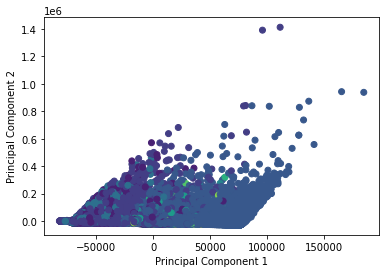

In [137]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate target variable
X = new_df.drop(columns='LoanStatus', axis=1)
Y = new_df['LoanStatus']

# Perform PCA on data
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

# Visualize features and target variable in 2D scatter plot
fig, ax = plt.subplots()
ax.scatter(data_pca[:, 0], data_pca[:, 1], c=Y)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.show()

### VarianceThreshold Method


In [138]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0) # threshold value of 0
X_train_new = selector.fit_transform(X_train)
selected_features = X_train.columns[selector.get_support()]
print(selected_features)



Index(['ListingCreationDate', 'CreditGrade', 'Term', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Month

In [139]:
constArr=selector.get_support()
constArr
#get_support() return True and False value for each feature.
#True: Not a constant feature
#False: Constant feature(It contains same value in all samples.)

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [140]:
import collections
#To find total number of constant and non constant features we will be using collections.Counter function.
collections.Counter(constArr)
#Non Constant feature:61
#Constant feature: 4

Counter({True: 61, False: 4})

In [141]:
#Print out constant feature name
constCol=[col for col in X_train.columns if col not in X_train.columns[constArr]]
constCol

['LenderYield',
 'CurrentDelinquencies',
 'LoanCurrentDaysDelinquent',
 'LoanOriginalAmount']

### Based on my visualization of feature selection techniques that I employed, I have concluded that certain features should be removed from the dataset. These features include 'LenderYield', 'CurrentDelinquencies', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', and 'Closeddate'.

In [142]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Separate target variable
X = new_df.drop(columns='LoanStatus', axis=1)
Y = new_df['LoanStatus']


# Perform feature selection using f_classif
selector = SelectKBest(f_classif, k=X.shape[1])
selector.fit(X, Y)

# Select highly correlated features
corr_threshold = 0.7
highly_corr_features = set()
for i in range(len(X.columns)):
    for j in range(i):
        if abs(selector.scores_[i] - selector.scores_[j]) < 0.01 and abs(X.corr().iloc[i, j]) > corr_threshold:
            colname_i = X.columns[i]
            colname_j = X.columns[j]
            if colname_i not in highly_corr_features and colname_j not in highly_corr_features:
                highly_corr_features.add(colname_i)

# Remove highly correlated features
X_filtered = X.drop(highly_corr_features, axis=1)

# Print the remaining features
print(X_filtered.columns)

Index(['ListingCreationDate', 'CreditGrade', 'Term', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'CreditScoreRangeLower', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOp

### Removing useless columns

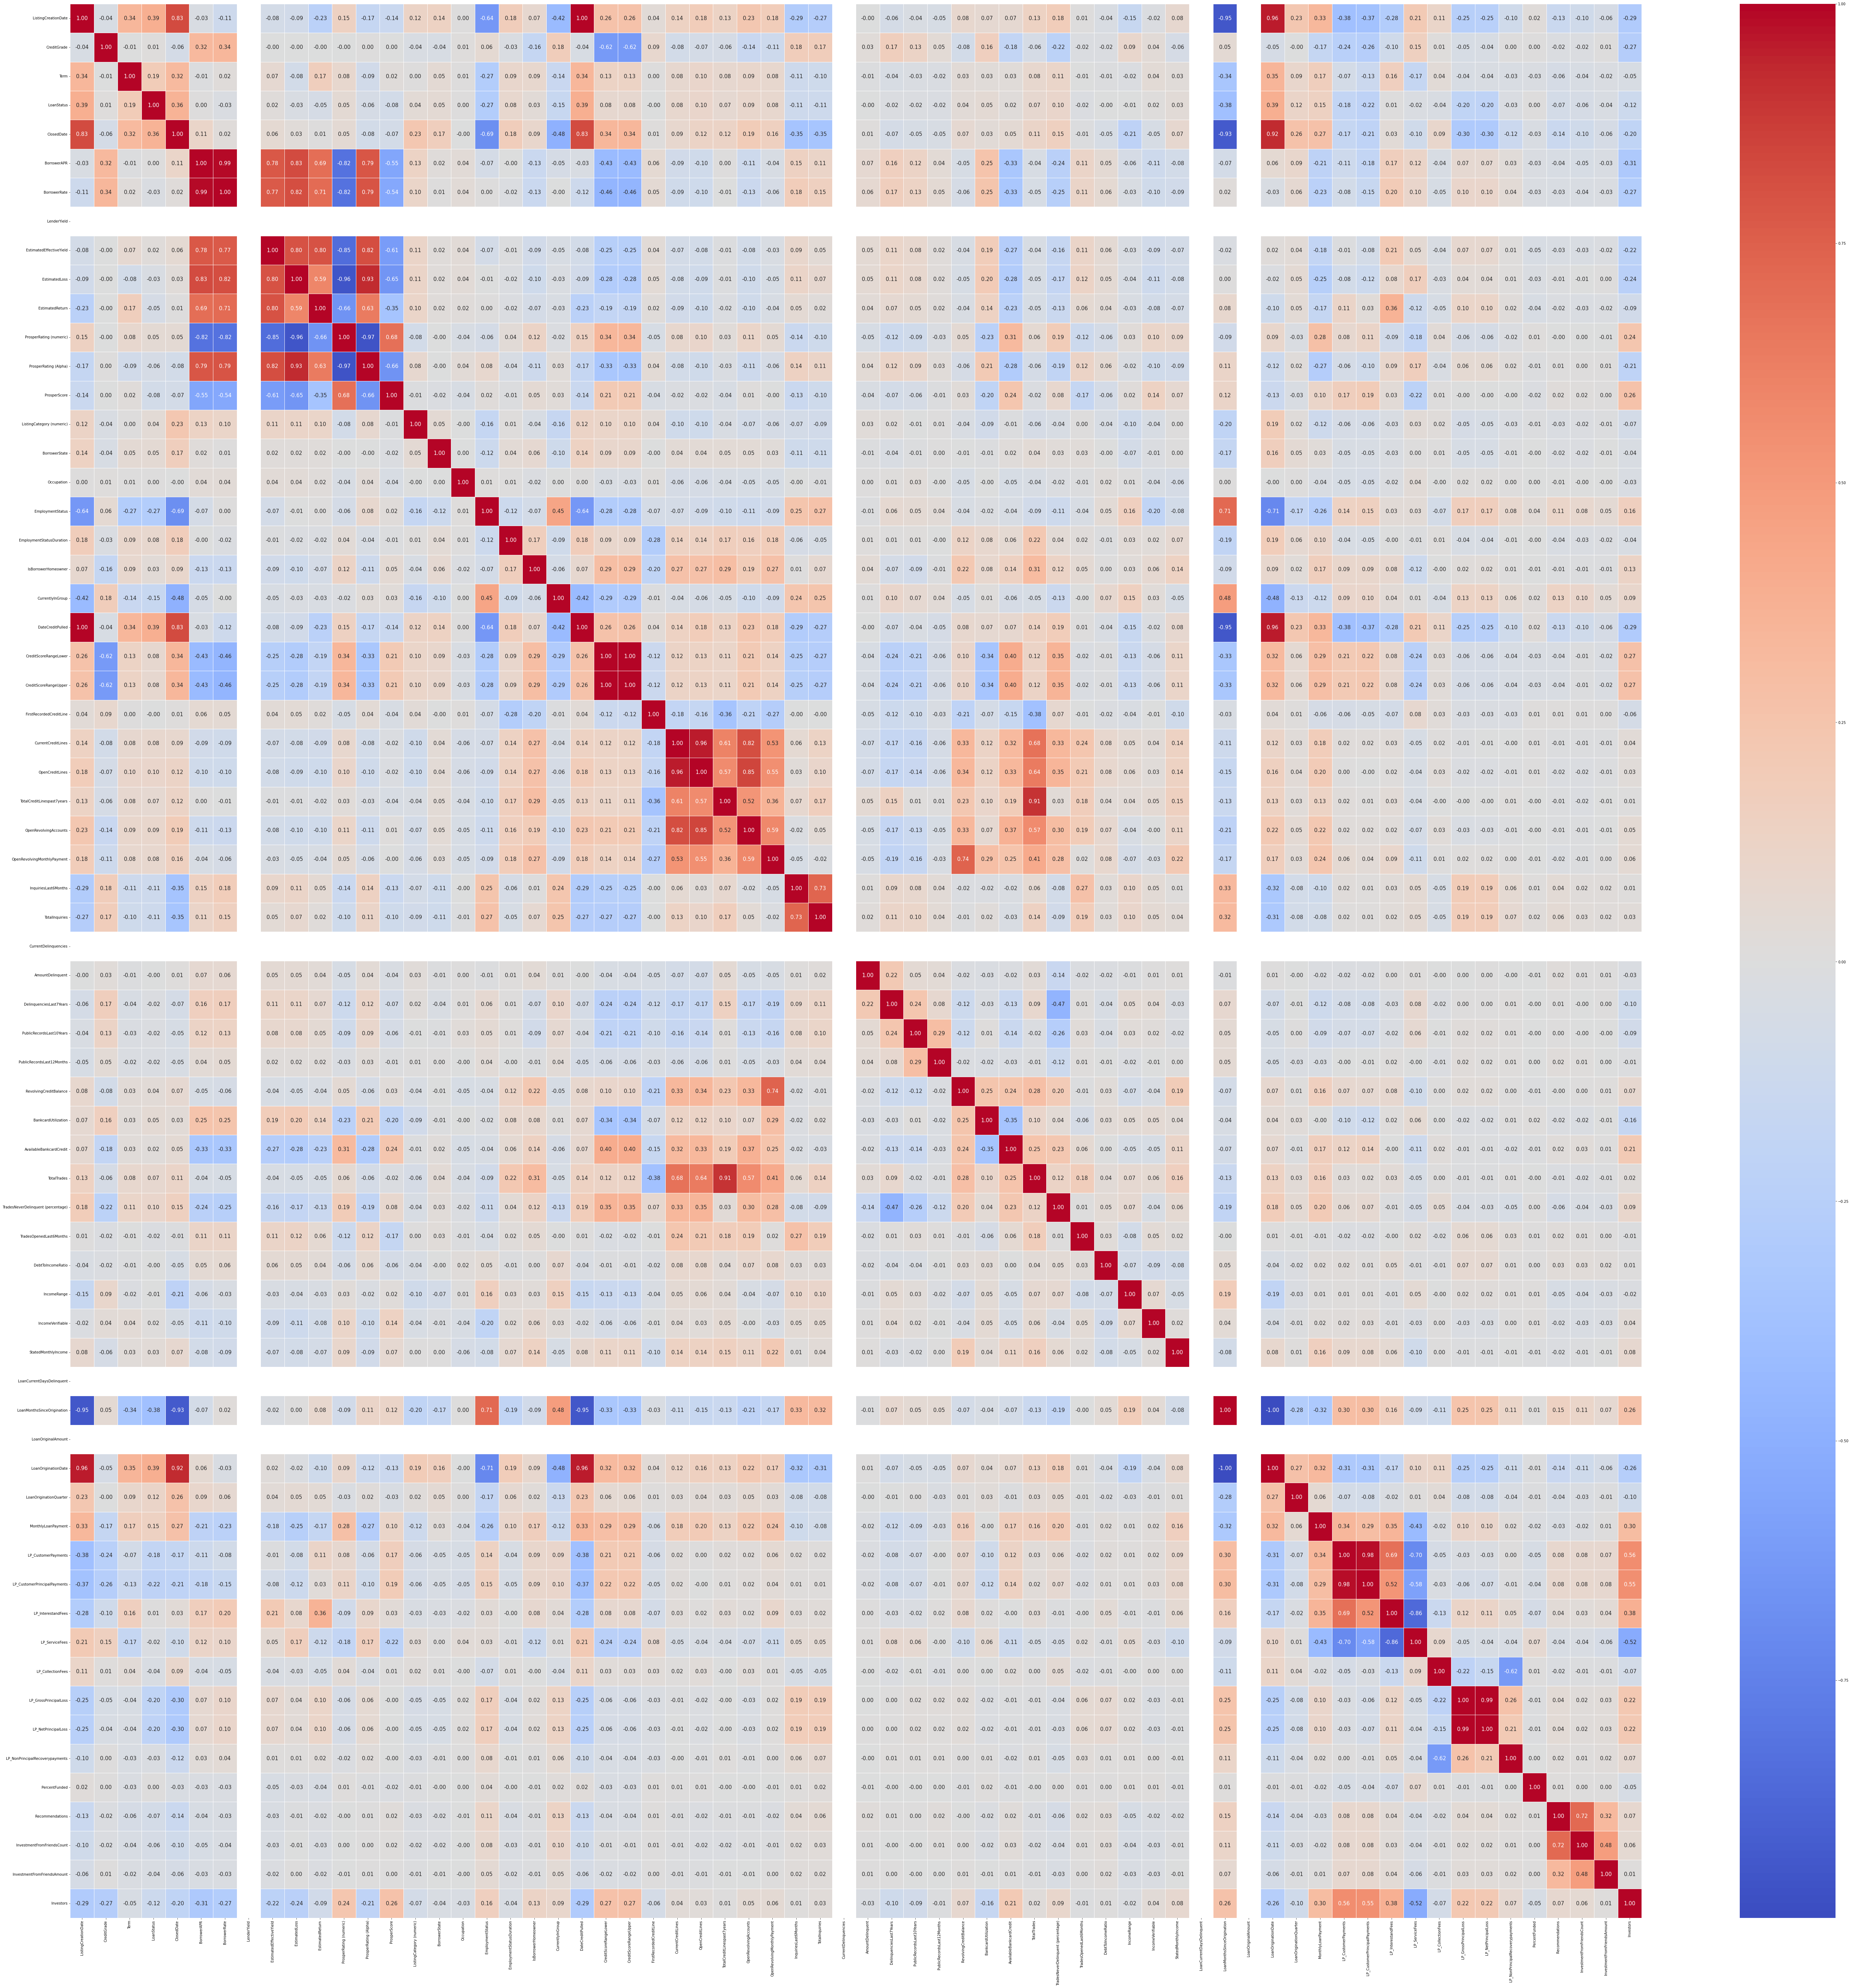

In [143]:
# Calculate the correlation matrix
corr_matrix = new_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(100, 100))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, annot_kws={"fontsize":15})

# Show the plot
plt.show()

In [144]:
# initialize list of lists
remove_data = ['LenderYield','CurrentDelinquencies','LoanCurrentDaysDelinquent','LoanOriginalAmount','ClosedDate','LoanOriginationDate','LoanMonthsSinceOrigination', 'ListingCreationDate','ProsperRating (numeric)','ProsperRating (Alpha)']
# Create the pandas DataFrame
removed_df = pd.DataFrame(remove_data, columns=['Low Score Columns'])
  
# print DataFrame
removed_df

Low Score Columns
0                 LenderYield
1        CurrentDelinquencies
2   LoanCurrentDaysDelinquent
3          LoanOriginalAmount
4                  ClosedDate
5         LoanOriginationDate
6  LoanMonthsSinceOrigination
7         ListingCreationDate
8     ProsperRating (numeric)
9       ProsperRating (Alpha)

## according to this heat map we will going to drop this columns 


In [145]:
new_df.drop(['LenderYield','CurrentDelinquencies', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount','ClosedDate','LoanOriginationDate','LoanMonthsSinceOrigination','ListingCreationDate','ProsperRating (numeric)','ProsperRating (Alpha)'], axis=1)

CreditGrade  Term  LoanStatus  BorrowerAPR  BorrowerRate  \
0                 3    36           2      0.16516        0.1580   
1                 3    36           3      0.12016        0.0920   
2                 6    36           2      0.28269        0.2750   
3                 3    36           3      0.12528        0.0974   
4                 3    36           3      0.24614        0.2085   
...             ...   ...         ...          ...           ...   
113932            3    36           3      0.22354        0.1864   
113933            3    36           5      0.13220        0.1110   
113934            3    60           3      0.23984        0.2150   
113935            3    60           2      0.28408        0.2605   
113936            3    36           3      0.13189        0.1039   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperScore  \
0                       0.16150         0.0724          0.09170           6.0   
1                       0.07960         0.0249          0.05470           7.0   
2                       0.16150         0.0724          0.09170           6.0   
3                       0.08490         0.0249          0.06000           9.0   
4                       0.18316         0.0925          0.09066           4.0   
...                         ...            ...              ...           ...   
113932                  0.16490         0.0699          0.09500           5.0   
113933                  0.10070         0.0200          0.08070           8.0   
113934                  0.18828         0.1025          0.08578           3.0   
113935                  0.24450         0.0850          0.15950           5.0   
113936                  0.09071         0.0299          0.06081           7.0   

        ListingCategory (numeric)  BorrowerState  Occupation  \
0                               0              5          35   
1                               2              5          41   
2                               0             10          35   
3                              16             10          50   
4                               2             23          19   
...                           ...            ...         ...   
113932                          1             14          23   
113933                          7             38          41   
113934                          1             43          35   
113935                          2             10          22   
113936                          1             34          42   

        EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                      1                       2.0                 True   
1                      0                      44.0                False   
2                      2                      67.0                False   
3                      0                     113.0                 True   
4                      0                      44.0                 True   
...                  ...                       ...                  ...   
113932                 0                     246.0                 True   
113933                 0                      21.0                 True   
113934                 0                      84.0                 True   
113935                 1                      94.0                 True   
113936                 0                     244.0                False   

        CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
0                   True             14346                  640.0   
1                  False            111882                  680.0   
2                   True              6445                  480.0   
3                  False             64723                  800.0   
4                  False             85856                  680.0   
...                  ...               ...                    ...   
113932             False             72603                  700.0

### Model Creation using LogisticRegression & Naives Bayes

In [146]:
from sklearn.feature_selection import SelectKBest

In [147]:
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ListingCreationDate', 'ClosedDate', 'BorrowerAPR',
       'EstimatedEffectiveYield', 'EstimatedReturn', 'DateCreditPulled',
       'LoanMonthsSinceOrigination', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'LP_CustomerPrincipalPayments'],
      dtype='object')

In [148]:
#### Standardize the data

In [149]:
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

In [152]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train_std, Y_train)

LogisticRegression()

In [153]:
Y_pred = clf.predict(X_test_std)

In [154]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.86%


Text(0.5, 1.0, 'Confusion Matrix')

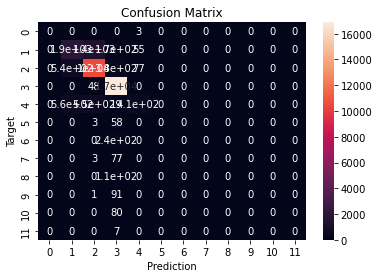

In [155]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, Y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [156]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

In [157]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.63      0.54      0.58      3548
           2       0.84      0.91      0.87     11487
           3       0.93      1.00      0.96     16930
           4       0.75      0.27      0.39      1541
           5       0.00      0.00      0.00        61
           6       0.00      0.00      0.00       241
           7       0.00      0.00      0.00        80
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00        92
          10       0.00      0.00      0.00        80
          11       0.00      0.00      0.00         7

    accuracy                           0.87     34182
   macro avg       0.26      0.23      0.23     34182
weighted avg       0.84      0.87      0.85     34182



In [158]:
confusion_matrix(Y_test,Y_pred)

array([[    0,     0,     0,     0,     3,     0,     0,     0,     0,
            0,     0,     0],
       [    0,  1904,  1423,   166,    55,     0,     0,     0,     0,
            0,     0,     0],
       [    0,   540, 10494,   376,    77,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,    48, 16882,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,   557,   554,    19,   411,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     3,    58,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,   241,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     3,    77,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,   112,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     1,    91,     0,     0,     0,     0,     0,
            0,     0

Accuracy

In [159]:
 (0 + 1904 + 10494 + 16882 + 411 + 0 + 0 + 0 + 0 + 0 + 0 + 0) / (0 + 0 + 0 + 0 + 3 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 1904 + 1423 + 166 + 55 + 540 + 10494 + 376 + 77 + 0 + 0 + 0 + 0 + 0 + 48 + 16882 + 0 + 0 + 0 + 0 + 557 + 554 + 19 + 411 + 0 + 0 + 0 + 0 + 0 + 3 + 58 + 0 + 0 + 0 + 0 + 0 + 241 + 0 + 0 + 0 + 0 + 0 + 3 + 77 + 0 + 0 + 0 + 0 + 0 + 112 + 0 + 0 + 0 + 0 + 0 + 1 + 91 + 0 + 0 + 0 + 0 + 0 + 80 + 0 + 0 + 0 + 0 + 0 + 7)

0.8686150605581885

Precision for class 1

In [160]:
 1904 / (1904 + 540 + 557 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0)

0.6344551816061312

Recall for class 2

In [161]:
10494 / (0 + 1423 + 10494 + 48 + 554 + 3 + 0 + 0 + 0 + 1 + 0 + 0)

0.837978120258724

### LogisticRegression

In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Split data into features (X) and target (y)
# Separate target variable
X = new_df.drop(columns='LoanStatus', axis=1)
y = new_df['LoanStatus']
# Preprocess data
# ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the performance of the model on the training data
y_train_pred = lr_model.predict(X_train)
print('Training set accuracy:', accuracy_score(y_train, y_train_pred))


# Evaluate the performance of the model on the testing data
y_test_pred = lr_model.predict(X_test)
print('Testing set accuracy:', accuracy_score(y_test, y_test_pred))


Training set accuracy: 0.8818857036281254
Testing set accuracy: 0.8748464103914341


##### Naives Bayes

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
# Separate target variable
X = new_df.drop(columns='LoanStatus', axis=1)
y = new_df['LoanStatus']
# Preprocess data
# ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Naive Bayes model to the training data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate the performance of the model on the training data
y_train_pred = nb_model.predict(X_train)
print('Training set accuracy:', accuracy_score(y_train, y_train_pred))

# Evaluate the performance of the model on the testing data
y_test_pred = nb_model.predict(X_test)
print('Testing set accuracy:', accuracy_score(y_test, y_test_pred))


Training set accuracy: 0.7830146244061921
Testing set accuracy: 0.785106196243637


#### Decision Tree Algorithm

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
# Separate target variable
X = new_df.drop(columns='LoanStatus', axis=1)
y = new_df['LoanStatus']
# Preprocess data
# ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree model to the training data
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluate the performance of the model on the training data
y_train_pred = dt_model.predict(X_train)
print('Training set accuracy:', accuracy_score(y_train, y_train_pred))

# Evaluate the performance of the model on the testing data
y_test_pred = dt_model.predict(X_test)
print('Testing set accuracy:', accuracy_score(y_test, y_test_pred))


Training set accuracy: 1.0
Testing set accuracy: 0.9243461470949622


###   K-Nearest Neighbour (KNN)

In [165]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
# Separate target variable
X = new_df.drop(columns='LoanStatus', axis=1)
y = new_df['LoanStatus']
# Preprocess data
# ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier instance with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Evaluate the performance of the model on the training data
y_train_pred = knn_model.predict(X_train)
print('Training set accuracy:', accuracy_score(y_train, y_train_pred))

# Evaluate the performance of the model on the testingdata
y_test_pred = knn_model.predict(X_test)
print('Testing set accuracy:', accuracy_score(y_test, y_test_pred))


Training set accuracy: 0.8928348089392094
Testing set accuracy: 0.8558451816745656


### Support Vector Machines (SVM) 

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
# Separate target variable
X = new_df.drop(columns='LoanStatus', axis=1)
y = new_df['LoanStatus']

# Preprocess data
# ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier instance with an RBF kernel and C=1
svm_model = SVC(kernel='rbf', C=1)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(svm_model, X, y, cv=5)

print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

# Evaluate the performance of the model on the training data
y_train_pred = svm_model.predict(X_train)
print('Training set accuracy:', accuracy_score(y_train, y_train_pred))

# Evaluate the performance of the model on the testing data
y_test_pred = svm_model.predict(X_test)
print('Testing set accuracy:', accuracy_score(y_test, y_test_pred))

### model Deployment

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
# Separate target variable
X = new_df.drop(columns='LoanStatus', axis=1)
y = new_df['LoanStatus']
# Preprocess data
# ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree model to the training data
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluate the performance of the model on the training data
y_train_pred = dt_model.predict(X_train)
print('Training set accuracy:', accuracy_score(y_train, y_train_pred))

# Evaluate the performance of the model on the testing data
y_test_pred = dt_model.predict(X_test)
print('Testing set accuracy:', accuracy_score(y_test, y_test_pred))


Training set accuracy: 1.0
Testing set accuracy: 0.9238634368966122
